# Import Libraries 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import math
import missingno as mno 

D:\ANACONDA LAST\envs\tf-gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import data  from Internet

url_metadata = "http://datos.energia.gob.ar/dataset/c846e79c-026c-4040-897f-1ad3543b407c/resource/cbfa4d79-ffb3-4096-bab5-eb0dde9a8385/download/listado-de-pozos-cargados-por-empresas-operadoras.csv"
url_wellprod = "http://datos.energia.gob.ar/dataset/71fa2e84-0316-4a1b-af68-7f35e41f58d7/resource/2280ad92-6ed3-403e-a095-50139863ab0d/download/datos-de-fractura-de-pozos-de-hidrocarburos-adjunto-iv-actualizacin-diaria.csv"
url_hf = "http://datos.energia.gob.ar/dataset/c846e79c-026c-4040-897f-1ad3543b407c/resource/b5b58cdc-9e07-41f9-b392-fb9ec68b0725/download/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv"


df_metadat = pd.read_csv(url_metadata)
df_wellprod = pd.read_csv(url_wellprod)
df_hf = pd.read_csv(url_hf)

df_hf.head()

#  Import data from Desktop 

In [2]:
url_prod = "produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv"

dff_prod = pd.read_csv(url_prod)


# Preparaing our Dataset 

##  Production de puits de gaz et de petrole non conventionnels

In [3]:
dff_prod.head()

idempresa  anio  mes  idpozo  prod_pet  prod_gas  prod_agua  iny_agua  \
0      YSUR  2015    1  147505      8.52    153.82      14.71       0.0   
1      YSUR  2015    1  130515      0.00     33.24      13.37       0.0   
2      YSUR  2015    1  145329      0.00      0.00       0.00       0.0   
3      YSUR  2015    1  152786    242.14   2195.54      49.30       0.0   
4      YSUR  2015    1  133430      0.00      0.00       0.00       0.0   

   iny_gas  iny_co2  ...    cuenca  provincia  coordenadax coordenaday  \
0      0.0      0.0  ...  NEUQUINA    Neuquén   -69.181060  -39.079080   
1      0.0      0.0  ...  NEUQUINA    Neuquén   -69.785229  -38.949104   
2      0.0      0.0  ...  NEUQUINA    Neuquén   -69.903384  -38.067634   
3      0.0      0.0  ...  NEUQUINA    Neuquén   -69.181060  -39.079080   
4      0.0      0.0  ...  NEUQUINA    Neuquén   -69.193993  -39.078224   

   tipo_de_recurso  proyecto clasificacion       subclasificacion  \
0  NO CONVENCIONAL  GAS PLUS   EXPLOTACION             DESARROLLO   
1  NO CONVENCIONAL  GAS PLUS   EXPLOTACION             DESARROLLO   
2  NO CONVENCIONAL  GAS PLUS   EXPLORACION  EXPLORATORIO PROFUNDO   
3  NO CONVENCIONAL  GAS PLUS   EXPLOTACION             DESARROLLO   
4  NO CONVENCIONAL  GAS PLUS   EXPLORACION            EXPLORACION   

  sub_tipo_recurso  fecha_data  
0            TIGHT  2015-01-31  
1            TIGHT  2015-01-31  
2            SHALE  2015-01-31  
3            TIGHT  2015-01-31  
4            TIGHT  2015-01-31  

[5 rows x 40 columns]

In [4]:
dict_prod = {
    'idempresa' : 'idcompany' , 
    'sigla' : 'wellname',
    'anio' : 'year' , 
    'mes' : 'month' , 
    'idpozo' : 'puit_id' ,
    'prod_pet' : 'oilprod' , 
    'prod_gas' : 'gasprod' , 
    'prod_agua' : 'waterprod' , 
    'iny_agua' : 'waterinj' , 
    'iny_gas' : 'gasinj' ,
    'iny_co2' : 'co2inj',
    'tef' : 'effective_time',
    'tipoextraccion' : 'extraction_type',
    'empresa' : 'company',
    'profundidad': 'depth',
    'formacion' : 'formation',
    'cuenca' : 'bassin' ,
    'coordenadax' : 'longitude',
    'coordenaday' : 'latitude' , 
    'tipo_de_recurso' : 'ressource_type' ,
    'clasificacion' : 'classification' , 
    'fecha_data' : 'dates'   
}

dff_prod = dff_prod.rename(columns = dict_prod )

In [5]:
prod_col= ['idcompany', 'wellname', 'year', 'month', 'puit_id', 'oilprod', 'gasprod', 'waterprod', 'waterinj', 'gasinj', 'co2inj', 'effective_time', 'extraction_type', 'company', 'depth', 'formation', 'bassin', 'longitude', 'latitude', 'ressource_type', 'classification', 'dates']
dff_prod = dff_prod[prod_col]


dff_prod.head().T

0                              1  \
idcompany                                 YSUR                           YSUR   
wellname                    APA.Nq.RCo-1053(d)                   AEA.NQ.ACO-5   
year                                      2015                           2015   
month                                        1                              1   
puit_id                                 147505                         130515   
oilprod                                   8.52                            0.0   
gasprod                                 153.82                          33.24   
waterprod                                14.71                          13.37   
waterinj                                   0.0                            0.0   
gasinj                                     0.0                            0.0   
co2inj                                     0.0                            0.0   
effective_time                            31.0                           31.0   
extraction_type                   Plunger Lift                   Plunger Lift   
company          YSUR ENERGÍA ARGENTINA S.R.L.  YSUR ENERGÍA ARGENTINA S.R.L.   
depth                                   2852.0                         3428.0   
formation                              precuyo                        precuyo   
bassin                                NEUQUINA                       NEUQUINA   
longitude                            -69.18106                     -69.785229   
latitude                             -39.07908                     -38.949104   
ressource_type                 NO CONVENCIONAL                NO CONVENCIONAL   
classification                     EXPLOTACION                    EXPLOTACION   
dates                               2015-01-31                     2015-01-31   

                                             2                              3  \
idcompany                                 YSUR                           YSUR   
wellname                       APA.Nq.CorS.x-1                APA.Nq.Rco-1054   
year                                      2015                           2015   
month                                        1                              1   
puit_id                                 145329                         152786   
oilprod                                    0.0                         242.14   
gasprod                                    0.0                        2195.54   
waterprod                                  0.0                           49.3   
waterinj                                   0.0                            0.0   
gasinj                                     0.0                            0.0   
co2inj                                     0.0                            0.0   
effective_time                             0.0                           31.0   
extraction_type      Sin Sistema de Extracción              Surgencia Natural   
company          YSUR ENERGÍA ARGENTINA S.R.L.  YSUR ENERGÍA ARGENTINA S.R.L.   
depth                                   4500.0                         2940.0   
formation                          vaca muerta                        precuyo   
bassin                                NEUQUINA                       NEUQUINA   
longitude                           -69.903384                      -69.18106   
latitude                            -38.067634                      -39.07908   
ressource_type                 NO CONVENCIONAL                NO CONVENCIONAL   
classification                     EXPLORACION                    EXPLOTACION   
dates                               2015-01-31                     2015-01-31   

                                             4  
idcompany                                 YSUR  
wellname                     AEA.NQ.RCo.x-2001  
year                                      2015  
month                                        1  
puit_id                                 133430  
oilprod                

In [6]:
## On va supprimer le nom du puit et de la company car on a l'ID et le type de ressource , et co2inj car c'est nul 

new_col = ['year','month','wellname' ,'company','puit_id','oilprod','gasprod','waterprod','waterinj','gasinj',
         'effective_time','depth','longitude','latitude','idcompany' ,
           'extraction_type' , 'formation' , 'bassin' ,'classification' ,'dates']
df_prod= dff_prod[new_col]
dict_new = {
   'idcompany' : 'company_id' , 
    'formation' : 'champ' , 
    'classification' :'class' , 
    'wellname' : 'puit_nom'
}
df_prod.rename(columns= dict_new , inplace = True)
df_prod.head().T

C:\Users\dell\AppData\Local\Temp\ipykernel_12420\2865510648.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prod.rename(columns= dict_new , inplace = True)


0                              1  \
year                                      2015                           2015   
month                                        1                              1   
puit_nom                    APA.Nq.RCo-1053(d)                   AEA.NQ.ACO-5   
company          YSUR ENERGÍA ARGENTINA S.R.L.  YSUR ENERGÍA ARGENTINA S.R.L.   
puit_id                                 147505                         130515   
oilprod                                   8.52                            0.0   
gasprod                                 153.82                          33.24   
waterprod                                14.71                          13.37   
waterinj                                   0.0                            0.0   
gasinj                                     0.0                            0.0   
effective_time                            31.0                           31.0   
depth                                   2852.0                         3428.0   
longitude                            -69.18106                     -69.785229   
latitude                             -39.07908                     -38.949104   
company_id                                YSUR                           YSUR   
extraction_type                   Plunger Lift                   Plunger Lift   
champ                                  precuyo                        precuyo   
bassin                                NEUQUINA                       NEUQUINA   
class                              EXPLOTACION                    EXPLOTACION   
dates                               2015-01-31                     2015-01-31   

                                             2                              3  \
year                                      2015                           2015   
month                                        1                              1   
puit_nom                       APA.Nq.CorS.x-1                APA.Nq.Rco-1054   
company          YSUR ENERGÍA ARGENTINA S.R.L.  YSUR ENERGÍA ARGENTINA S.R.L.   
puit_id                                 145329                         152786   
oilprod                                    0.0                         242.14   
gasprod                                    0.0                        2195.54   
waterprod                                  0.0                           49.3   
waterinj                                   0.0                            0.0   
gasinj                                     0.0                            0.0   
effective_time                             0.0                           31.0   
depth                                   4500.0                         2940.0   
longitude                           -69.903384                      -69.18106   
latitude                            -38.067634                      -39.07908   
company_id                                YSUR                           YSUR   
extraction_type      Sin Sistema de Extracción              Surgencia Natural   
champ                              vaca muerta                        precuyo   
bassin                                NEUQUINA                       NEUQUINA   
class                              EXPLORACION                    EXPLOTACION   
dates                               2015-01-31                     2015-01-31   

                                             4  
year                                      2015  
month                                        1  
puit_nom                     AEA.NQ.RCo.x-2001  
company          YSUR ENERGÍA ARGENTINA S.R.L.  
puit_id                                 133430  
oilprod                                    0.0  
gasprod                                    0.0  
waterprod                                  0.0  
waterinj                                   0.0  
gasinj                                     0.0  
effective_time                             0.0  
depth                                   3204.0  
long

In [7]:
df_prod.shape

(227221, 20)

### Missing Values 

In [8]:
df_prod.isnull().sum().sort_values(ascending = False )/df_prod.shape[0]*100

class              0.323034
extraction_type    0.190123
year               0.000000
month              0.000000
bassin             0.000000
champ              0.000000
company_id         0.000000
latitude           0.000000
longitude          0.000000
depth              0.000000
effective_time     0.000000
gasinj             0.000000
waterinj           0.000000
waterprod          0.000000
gasprod            0.000000
oilprod            0.000000
puit_id            0.000000
company            0.000000
puit_nom           0.000000
dates              0.000000
dtype: float64

In [9]:
#we will delete rows with umpty values in Class and Extraction type because they aren't too much and will increase the error learning
df_prod = df_prod.dropna(axis= 'index' , how = 'any' , subset=['class' , 'extraction_type'])
df_prod.isnull().sum().sort_values(ascending = False)/df_prod.shape[0]*100


year               0.0
month              0.0
class              0.0
bassin             0.0
champ              0.0
extraction_type    0.0
company_id         0.0
latitude           0.0
longitude          0.0
depth              0.0
effective_time     0.0
gasinj             0.0
waterinj           0.0
waterprod          0.0
gasprod            0.0
oilprod            0.0
puit_id            0.0
company            0.0
puit_nom           0.0
dates              0.0
dtype: float64

###  Adding GVF , GOR , GLR

In [10]:
GVF = lambda oilprod,gazprod,waterprod :  gazprod/(oilprod +gazprod+waterprod)*100
GOR = lambda oilprod,gazprod,waterprod :  gazprod/(oilprod +gazprod)*100
GLR = lambda oilprod,gazprod,waterprod :  gazprod/(oilprod + waterprod) 

for i ,j in zip (['GVF%', 'GOR%' , 'GLR'] , [GVF , GOR , GLR]): 
    df_prod[i] = j(df_prod['oilprod'] ,df_prod['gasprod'] , df_prod['waterprod'] )
    df_prod[i] =df_prod[i].fillna(0)
    df_prod[i] =  df_prod[i].round(decimals = 2)
    
df_prod.head()

year  month            puit_nom                        company  puit_id  \
0  2015      1  APA.Nq.RCo-1053(d)  YSUR ENERGÍA ARGENTINA S.R.L.   147505   
1  2015      1        AEA.NQ.ACO-5  YSUR ENERGÍA ARGENTINA S.R.L.   130515   
2  2015      1     APA.Nq.CorS.x-1  YSUR ENERGÍA ARGENTINA S.R.L.   145329   
3  2015      1     APA.Nq.Rco-1054  YSUR ENERGÍA ARGENTINA S.R.L.   152786   
4  2015      1   AEA.NQ.RCo.x-2001  YSUR ENERGÍA ARGENTINA S.R.L.   133430   

   oilprod  gasprod  waterprod  waterinj  gasinj  ...   latitude  company_id  \
0     8.52   153.82      14.71       0.0     0.0  ... -39.079080        YSUR   
1     0.00    33.24      13.37       0.0     0.0  ... -38.949104        YSUR   
2     0.00     0.00       0.00       0.0     0.0  ... -38.067634        YSUR   
3   242.14  2195.54      49.30       0.0     0.0  ... -39.079080        YSUR   
4     0.00     0.00       0.00       0.0     0.0  ... -39.078224        YSUR   

             extraction_type        champ    bassin        class       dates  \
0               Plunger Lift      precuyo  NEUQUINA  EXPLOTACION  2015-01-31   
1               Plunger Lift      precuyo  NEUQUINA  EXPLOTACION  2015-01-31   
2  Sin Sistema de Extracción  vaca muerta  NEUQUINA  EXPLORACION  2015-01-31   
3          Surgencia Natural      precuyo  NEUQUINA  EXPLOTACION  2015-01-31   
4  Sin Sistema de Extracción      precuyo  NEUQUINA  EXPLORACION  2015-01-31   

    GVF%    GOR%   GLR  
0  86.88   94.75  6.62  
1  71.32  100.00  2.49  
2   0.00    0.00  0.00  
3  88.28   90.07  7.53  
4   0.00    0.00  0.00  

[5 rows x 23 columns]

   ## Discovring Numerical Data 

In [11]:
numerical = [i for i in df_prod.columns if df_prod[i].dtype != 'O' ]
df_prod[numerical].head(5)

year  month  puit_id  oilprod  gasprod  waterprod  waterinj  gasinj  \
0  2015      1   147505     8.52   153.82      14.71       0.0     0.0   
1  2015      1   130515     0.00    33.24      13.37       0.0     0.0   
2  2015      1   145329     0.00     0.00       0.00       0.0     0.0   
3  2015      1   152786   242.14  2195.54      49.30       0.0     0.0   
4  2015      1   133430     0.00     0.00       0.00       0.0     0.0   

   effective_time   depth  longitude   latitude   GVF%    GOR%   GLR  
0            31.0  2852.0 -69.181060 -39.079080  86.88   94.75  6.62  
1            31.0  3428.0 -69.785229 -38.949104  71.32  100.00  2.49  
2             0.0  4500.0 -69.903384 -38.067634   0.00    0.00  0.00  
3            31.0  2940.0 -69.181060 -39.079080  88.28   90.07  7.53  
4             0.0  3204.0 -69.193993 -39.078224   0.00    0.00  0.00

In [12]:
df_prod.describe()

year          month        puit_id        oilprod  \
count  226055.000000  226055.000000  226055.000000  226055.000000   
mean     2017.989657       6.432731  146959.772281     194.418209   
std         3.454680       3.402215   20128.892767     658.610234   
min      2006.000000       1.000000    3640.000000      -0.001000   
25%      2016.000000       4.000000  144702.000000       0.000000   
50%      2019.000000       6.000000  153767.000000       6.640000   
75%      2021.000000       9.000000  157873.000000      69.555000   
max      2022.000000      12.000000  163546.000000   16513.300000   

             gasprod      waterprod       waterinj         gasinj  \
count  226055.000000  226055.000000  226055.000000  226055.000000   
mean      626.826087     123.621572       5.103624       2.327977   
std      1485.425530     410.953706     327.439137     647.283763   
min       -12.267000       0.000000       0.000000       0.000000   
25%        10.300000       0.000000       0.000000       0.000000   
50%       119.730000      11.960000       0.000000       0.000000   
75%       542.565000      66.700000       0.000000       0.000000   
max     29129.660000   16575.560000   32980.690000  219701.660000   

       effective_time          depth      longitude       latitude  \
count   226055.000000  226055.000000  226055.000000  226055.000000   
mean        22.540804    3499.381459     -68.802129     -38.884133   
std         11.980558    6919.125722       0.875067       2.210329   
min          0.000000       0.000000     -71.357210     -69.415770   
25%         17.830000    2820.000000     -69.183251     -38.863351   
50%         29.500000    3142.000000     -68.873882     -38.558826   
75%         30.720000    3933.000000     -68.411671     -38.325150   
max         79.340000  378939.000000     -38.590070     -24.116560   

                GVF%           GOR%        GLR  
count  226055.000000  226055.000000  226055.00  
mean       51.308479      57.863701        inf  
std        39.582679      42.035072        NaN  
min         0.000000       0.000000      -7.37  
25%         8.630000      10.820000       0.09  
50%        56.710000      77.590000       1.31  
75%        91.600000      98.980000      10.90  
max       115.760000     115.760000        inf

In [13]:
#Nos données varient bien 

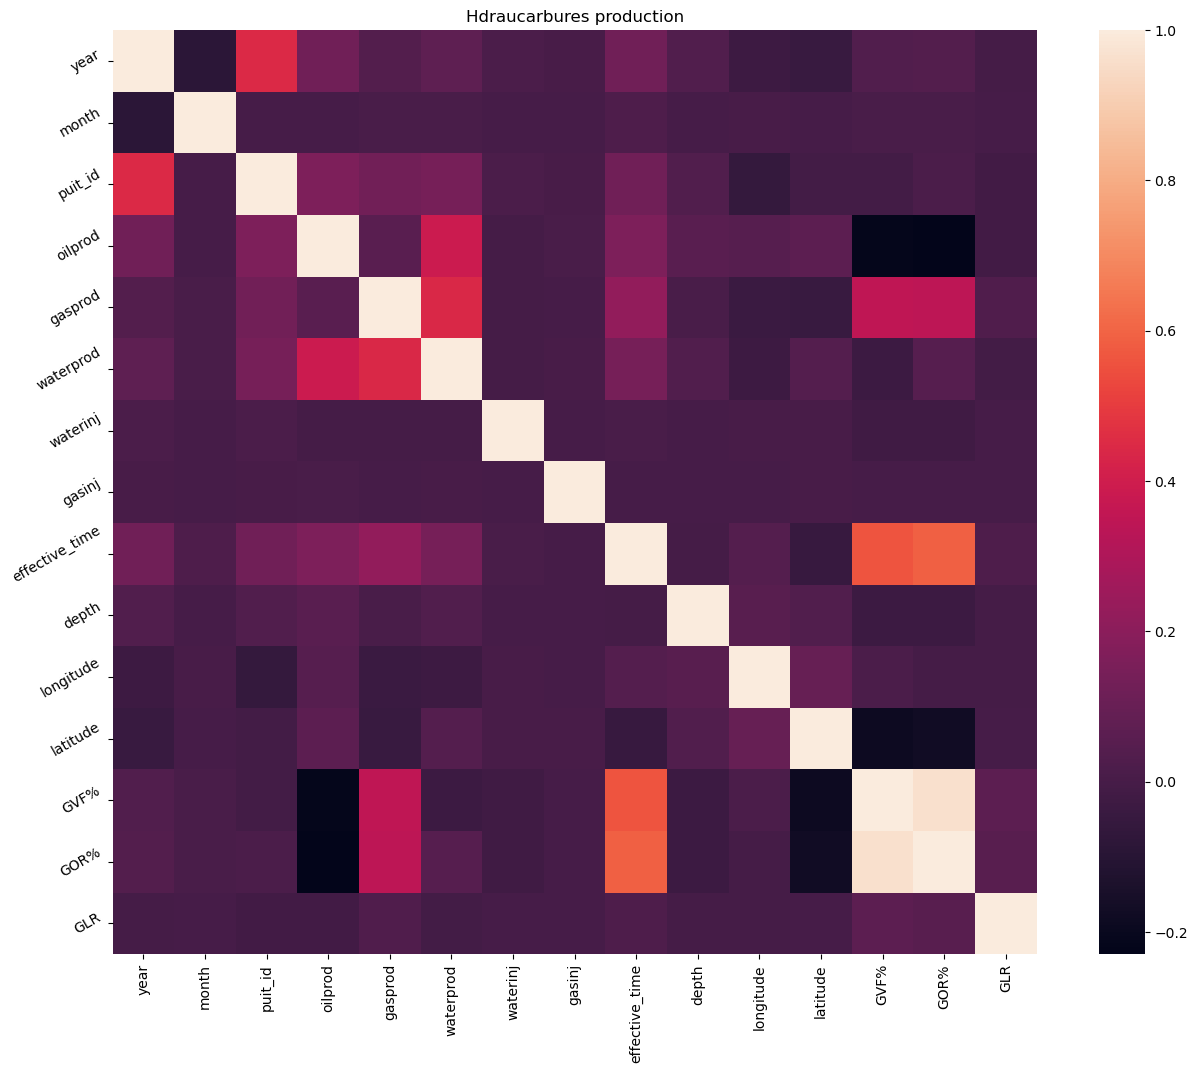

In [14]:
correlation = df_prod.corr()
plt.figure(figsize=(16,12))
plt.title('Hdraucarbures production')
ax = sns.heatmap(correlation, square=True, linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [15]:
df_prod['dates'] = pd.to_datetime(df_prod['dates'],format='%Y-%m-%d')
month_prod = df_prod.groupby(['year','month' ])
month_prod = month_prod[['oilprod','gasprod','waterprod']].sum()
#month_prod  = month_prod .set_index('dates')
month_prod.head()

oilprod      gasprod   waterprod
year month                                      
2006 1      1061.976500  32345.94064   993.13246
     2       983.128520  30535.02772   795.49068
     3      1121.978127  32792.23182   923.24665
     4      1110.140116  31305.10419   827.89328
     5      1505.214992  39218.73137  1358.45458

In [16]:
month_inj = df_prod.groupby(['year','month' ])
month_inj = month_inj[['gasinj','waterinj']].sum()
#month_prod  = month_prod .set_index('dates')
month_inj.head()

gasinj  waterinj
year month                  
2006 1         0.0       0.0
     2         0.0       0.0
     3         0.0       0.0
     4         0.0       0.0
     5         0.0       0.0

In [17]:
month_efftime = df_prod.groupby(['year','month' ])
month_efftime = month_efftime[['effective_time']].mean()
#month_prod  = month_prod .set_index('dates')
month_efftime.head()

effective_time
year month                
2006 1            5.424575
     2            5.382107
     3            5.781735
     4            5.607491
     5            6.636695

In [18]:
month_G = df_prod.groupby(['year','month' ])
month_G = month_G[['GVF%' , 'GOR%' ,'GLR' ]].mean()
#month_prod  = month_prod .set_index('dates')
month_G.head()

GVF%       GOR%  GLR
year month                           
2006 1      20.112500  20.781875  NaN
     2      19.975389  20.585544  NaN
     3      20.993557  21.765155  NaN
     4      20.379485  20.960619  NaN
     5      22.155567  22.925670  NaN

Text(0.5, 1.0, 'Monthly GVF GLR GOR  2006 -2020 ')

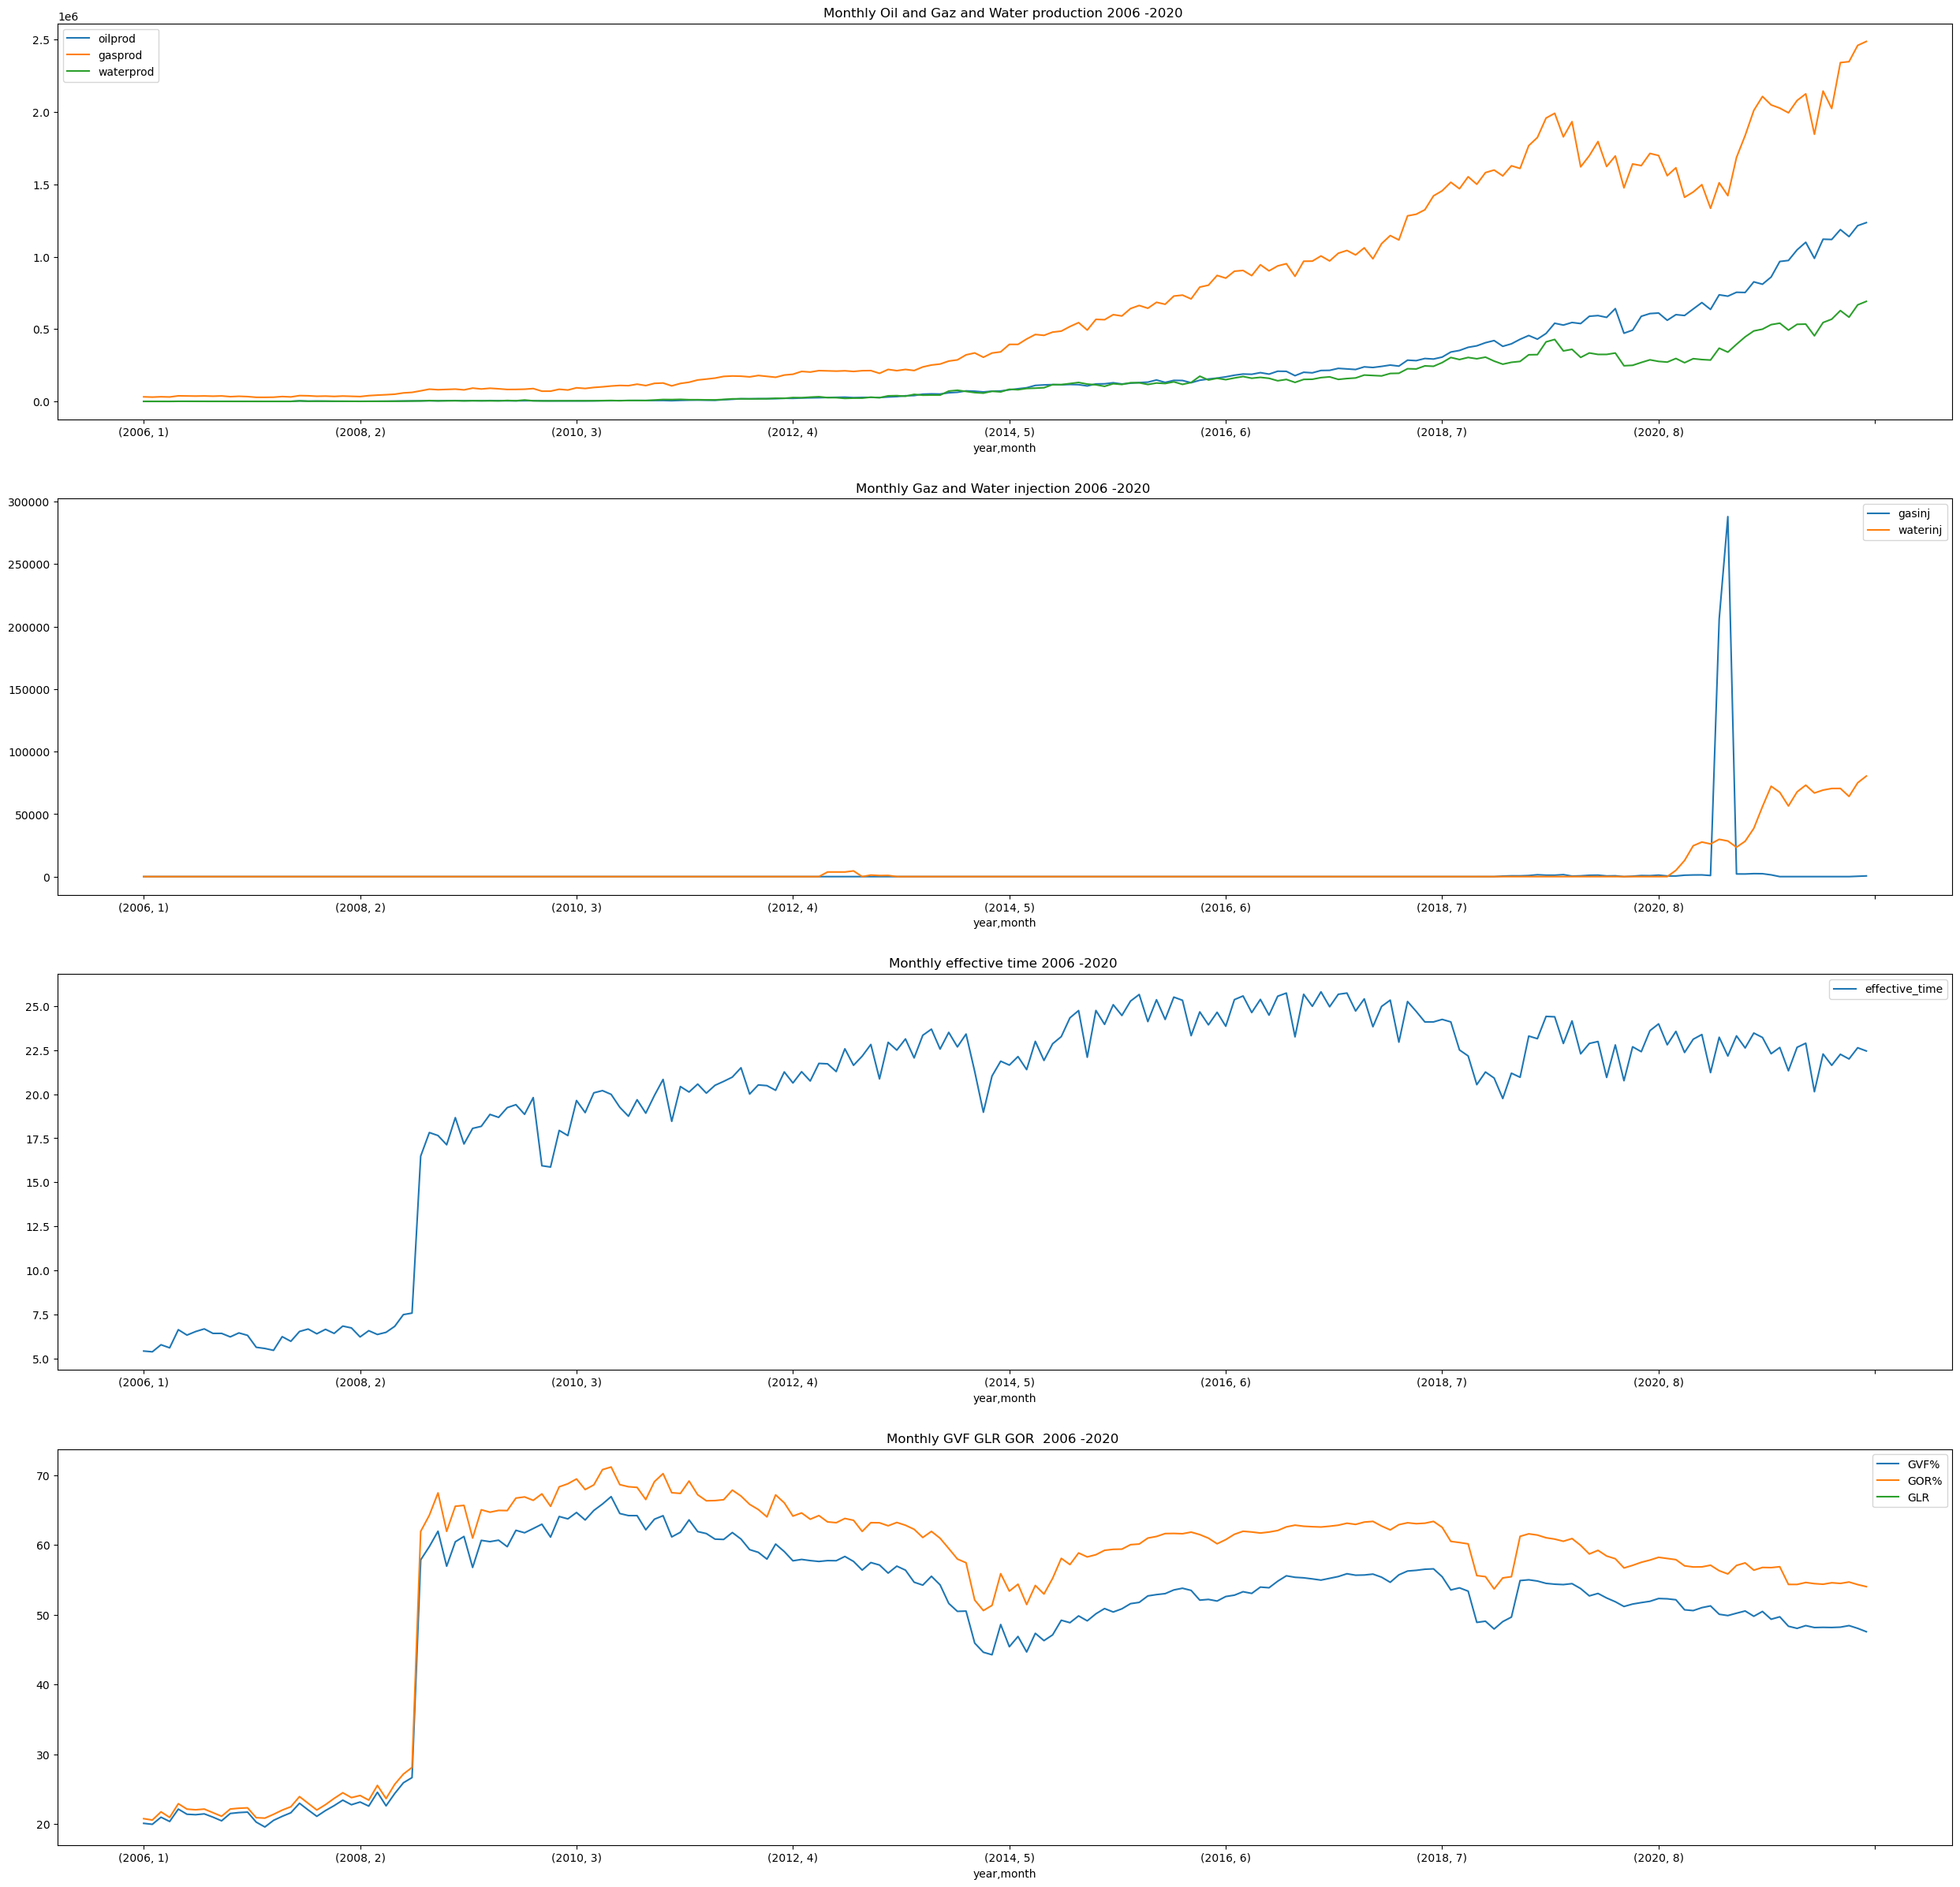

In [19]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(31,30))

ax1 = month_prod.plot(ax=ax1)
ax1.set_title('Monthly Oil and Gaz and Water production 2006 -2020 ')


ax2 = month_inj.plot(ax=ax2)
ax2.set_title('Monthly Gaz and Water injection 2006 -2020 ')


ax3 = month_efftime.plot(ax=ax3)
ax3.set_title('Monthly effective time 2006 -2020 ')

ax4 = month_G.plot(ax=ax4)
ax4.set_title('Monthly GVF GLR GOR  2006 -2020 ')



###  Distribution for Oil production

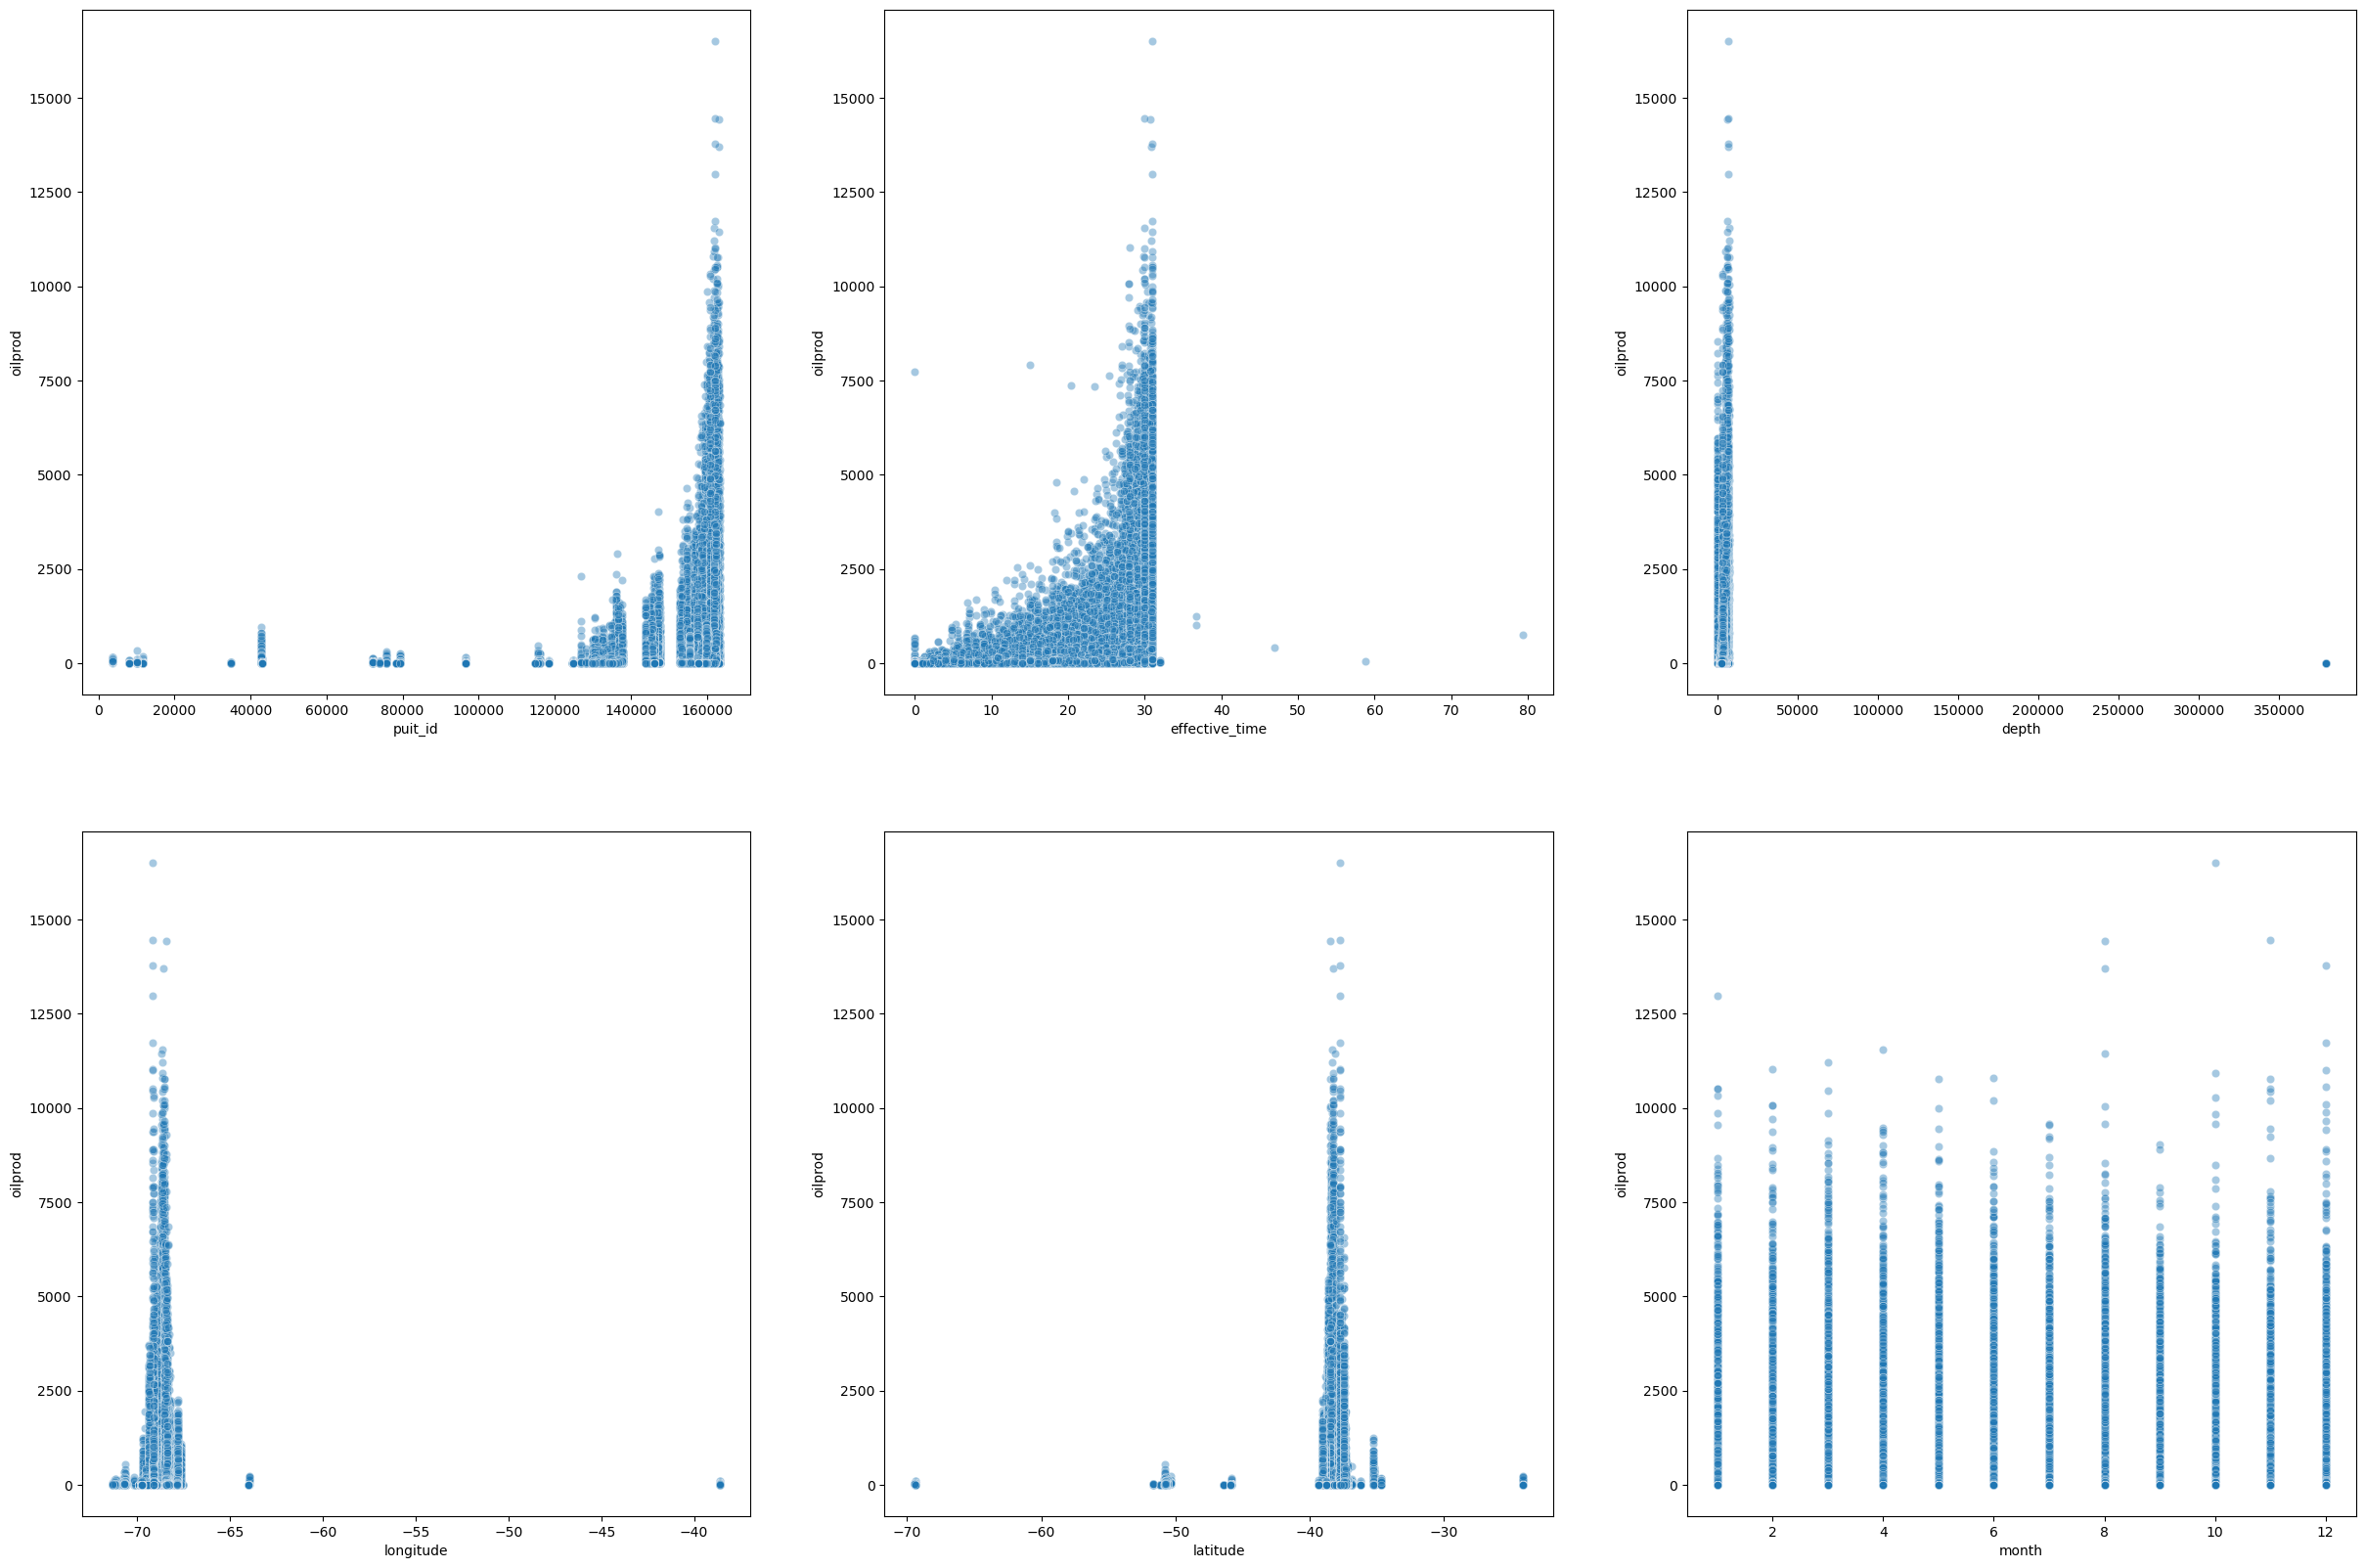

In [20]:

x = ['puit_id' , 'effective_time','depth','longitude','latitude','month']
y1 = 'oilprod'
y2 = 'gasprod'
y3 = 'waterprod'

plot , ax = plt.subplots(2,3 , figsize = (30 , 20))
for index in range(len(x)):
    sns.scatterplot(data = df_prod , y = y1 , x = x[index] , alpha=0.4 , ax = ax[math.floor(index/3)][index%3])
plt.show()



###  Distribution for Gaz production

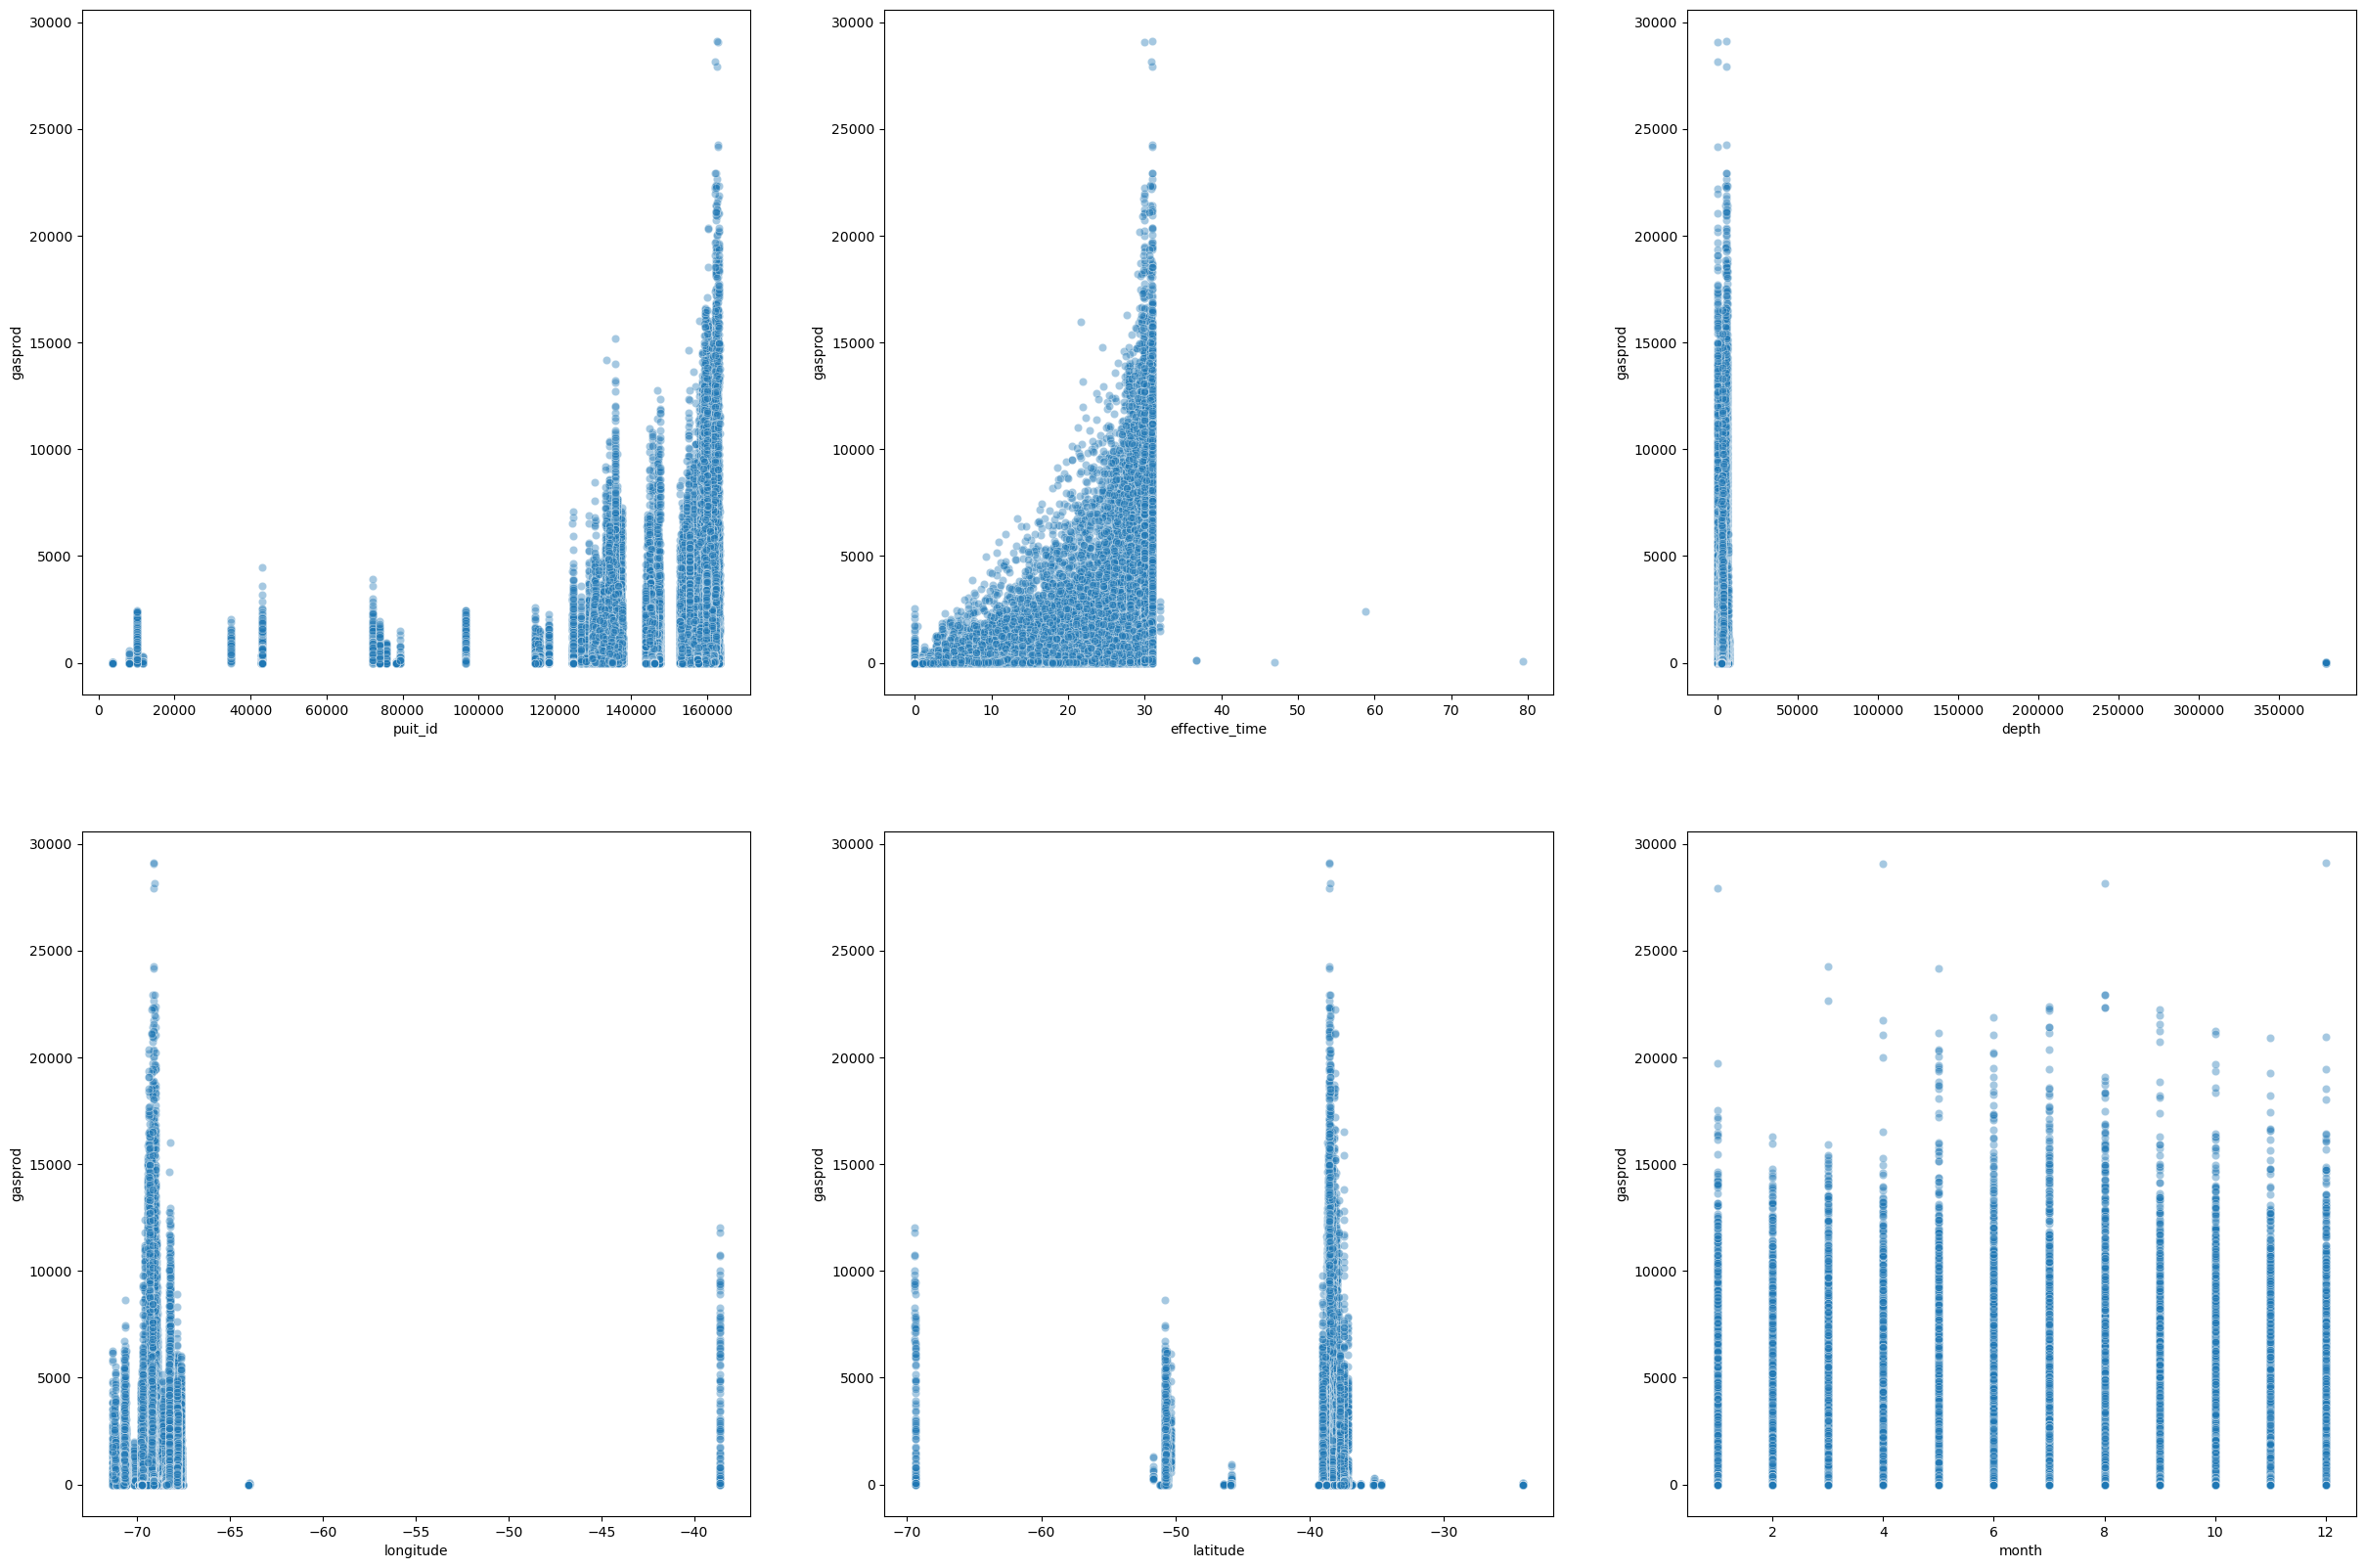

In [21]:
plot , ax = plt.subplots(2,3 , figsize = (30 , 20))
for index in range(len(x)):
    sns.scatterplot(data = df_prod , y = y2 , x = x[index] , alpha=0.4 , ax = ax[math.floor(index/3)][index%3])
plt.show()

###  Distribution for Water production 

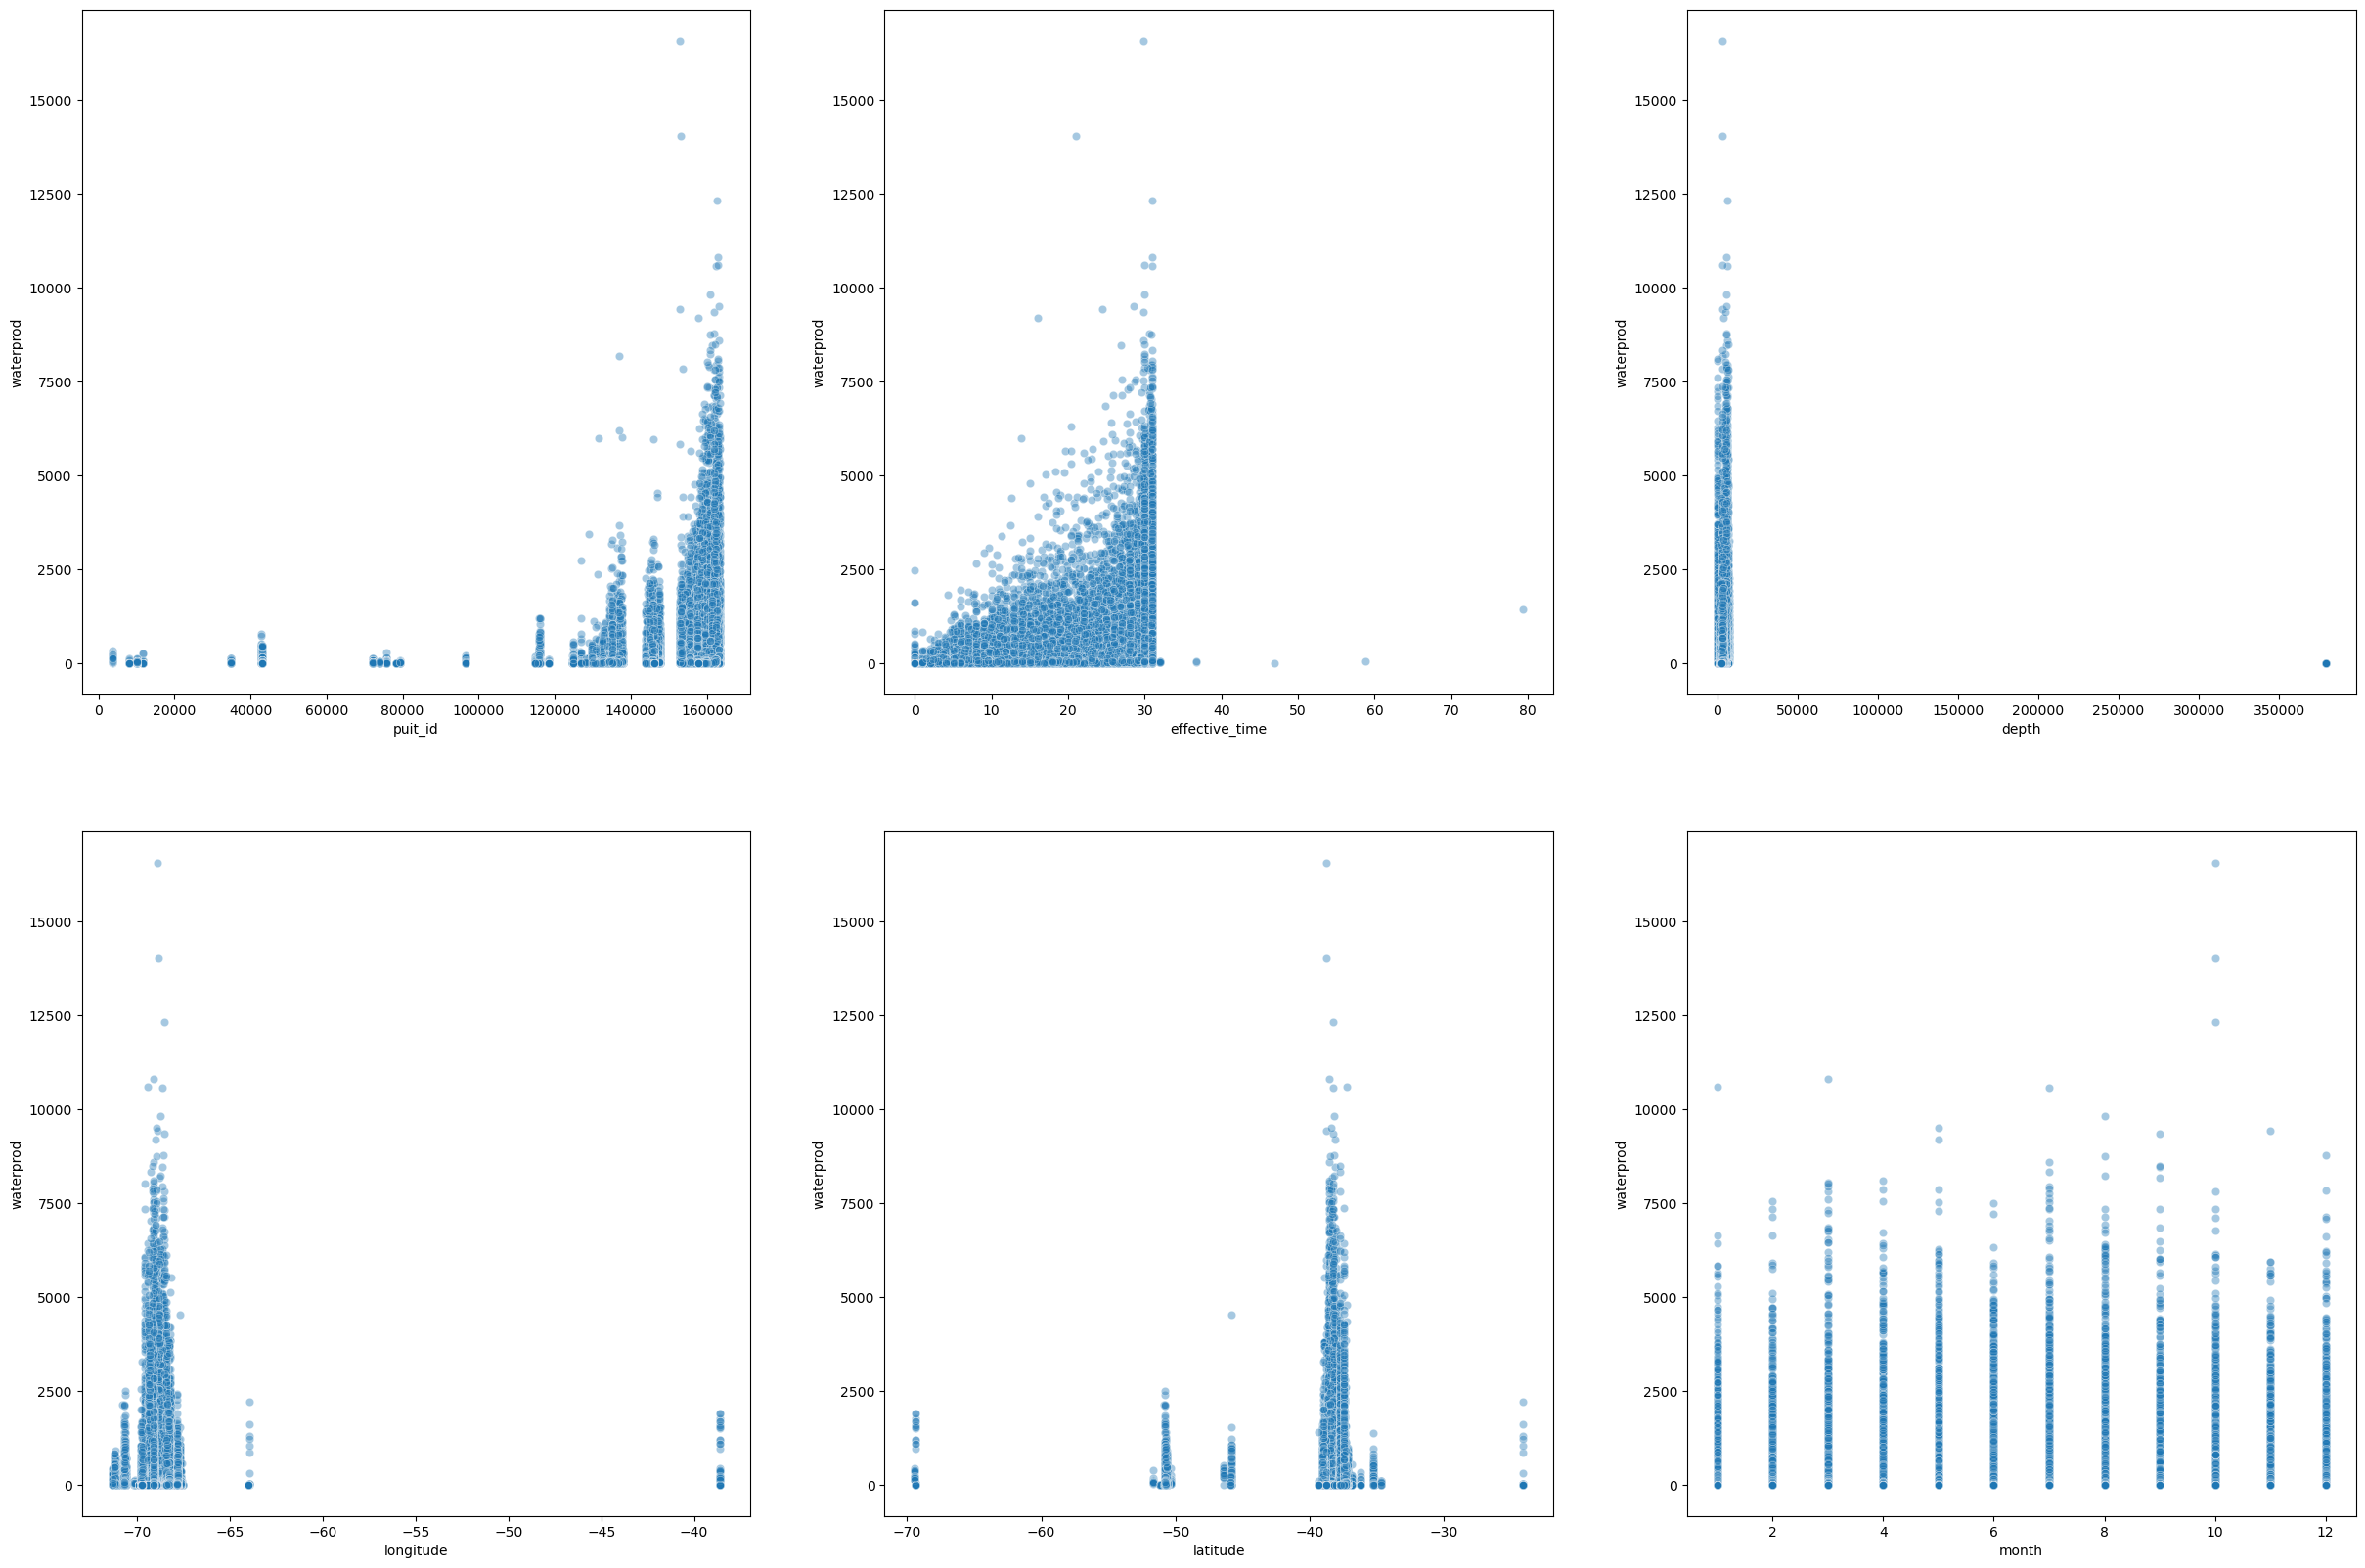

In [22]:
plot , ax = plt.subplots(2,3 , figsize = (30 , 20))
for index in range(len(x)):
    sns.scatterplot(data = df_prod , y = y3 , x = x[index] , alpha=0.4 , ax = ax[math.floor(index/3)][index%3])
plt.show()

###  Relation between Production and injection 

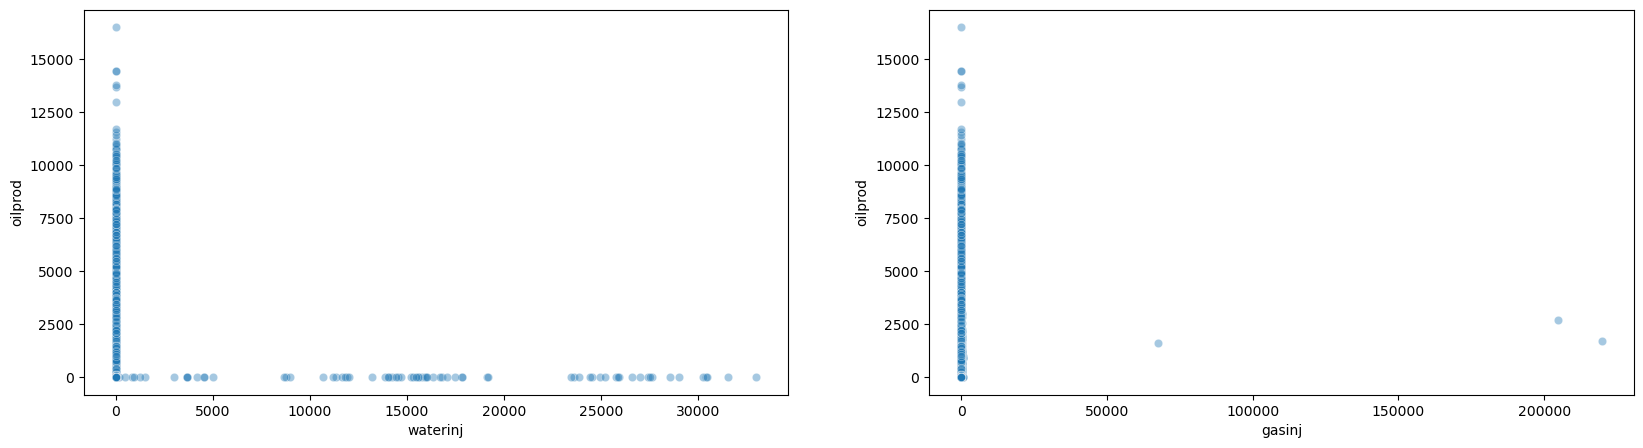

In [23]:
plot , ax = plt.subplots(1,2 , figsize = (20 , 5))

numerical_features = ['waterinj' ,'gasinj']

for index in range(len(numerical_features)):
        sns.scatterplot(data = df_prod , y = y1, x = numerical_features[index] , alpha=0.4 , ax = ax[index] )

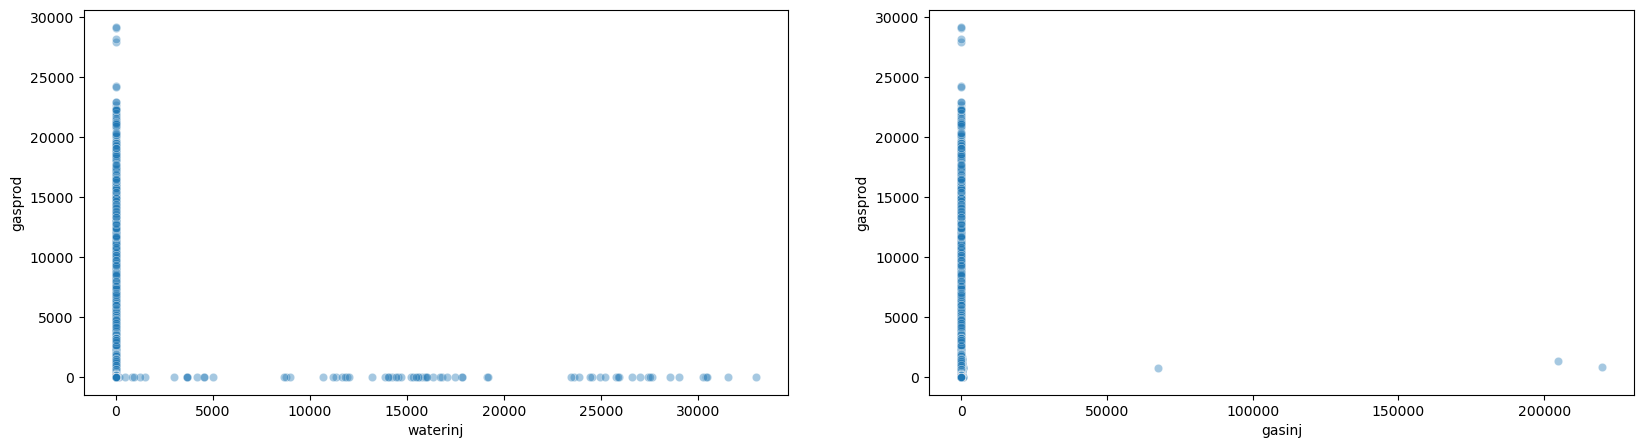

In [24]:
plot , ax = plt.subplots(1,2 , figsize = (20 , 5))
for index in range(len(numerical_features)):
        sns.scatterplot(data = df_prod , y = y2, x = numerical_features[index] , alpha=0.4 , ax = ax[index] )

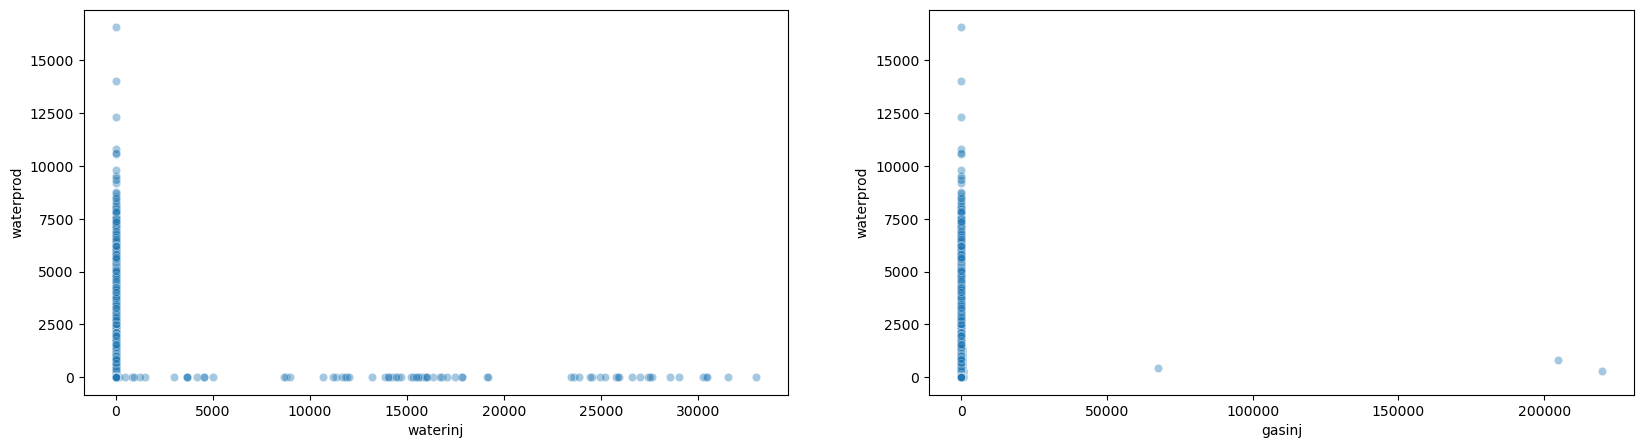

In [25]:
plot , ax = plt.subplots(1,2 , figsize = (20 , 5))
for index in range(len(numerical_features)):
        sns.scatterplot(data = df_prod , y = y3, x = numerical_features[index] , alpha=0.4 , ax = ax[index] )

##  Detecting Outliers 

Text(0, 0.5, 'gasinj')

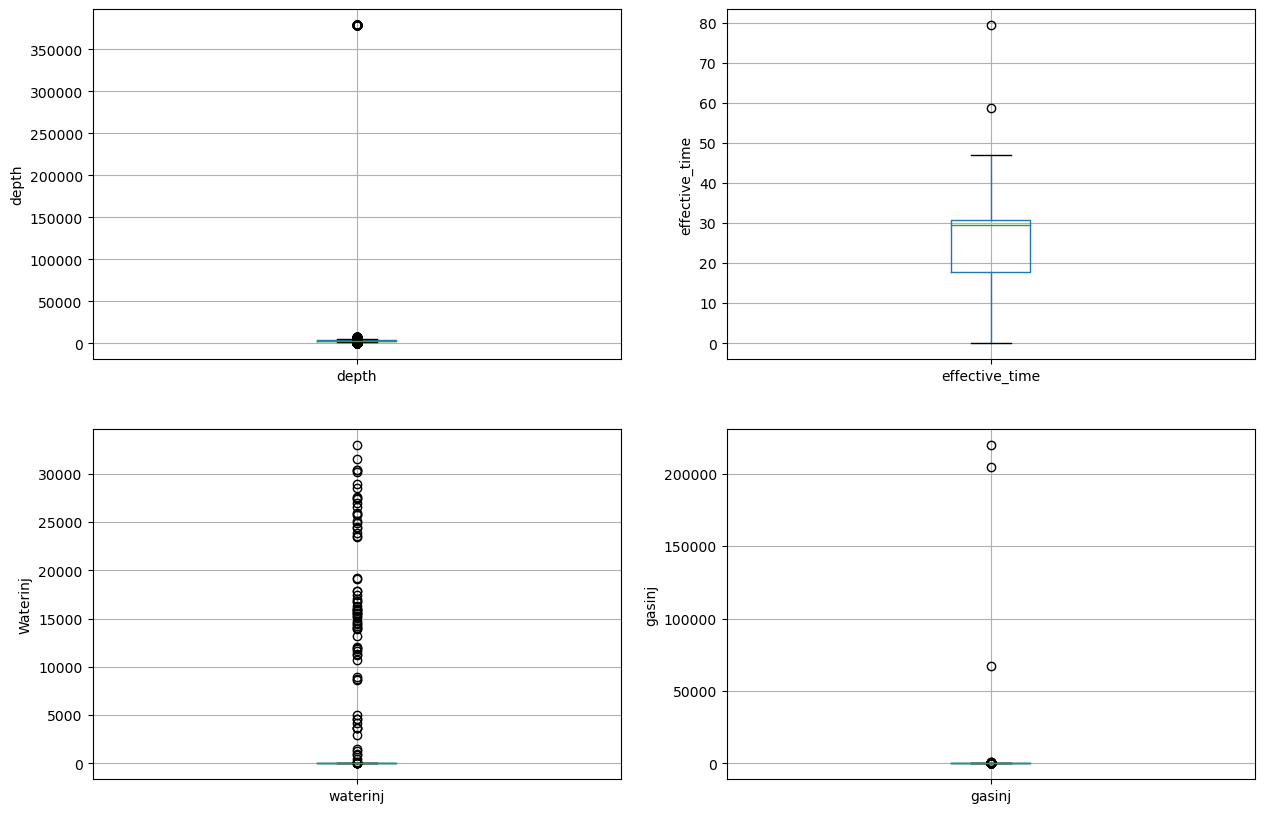

In [26]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df_prod.boxplot(column='depth')
fig.set_title('')
fig.set_ylabel('depth')


plt.subplot(2, 2, 2)
fig = df_prod.boxplot(column='effective_time')
fig.set_title('')
fig.set_ylabel('effective_time')


plt.subplot(2, 2, 3)
fig = df_prod.boxplot(column='waterinj')
fig.set_title('')
fig.set_ylabel('Waterinj')


plt.subplot(2, 2, 4)
fig = df_prod.boxplot(column='gasinj')
fig.set_title('')
fig.set_ylabel('gasinj')

In [27]:
print(f"there's {df_prod['depth'][df_prod['depth']>30000].nunique()} outliers from depth ")
print(f"there's {df_prod['gasinj'][df_prod['gasinj']>50000].nunique()} outliers from gasinj")
print(f"there's {df_prod['effective_time'][df_prod['effective_time']>50].nunique()} outliers from effective_time")

there's 1 outliers from depth 
there's 3 outliers from gasinj
there's 2 outliers from effective_time


In [28]:
df_prod = df_prod.drop(df_prod['depth'][df_prod['depth']>30000].index)
df_prod = df_prod.drop(df_prod['gasinj'][df_prod['gasinj']>50000].index)
df_prod = df_prod.drop(df_prod['effective_time'][df_prod['effective_time']>50].index)

print(f"there's {df_prod['depth'][df_prod['depth']>30000].nunique()} outliers from depth ")

there's 0 outliers from depth 


###  GVF analysis

In [29]:
df_gvf = df_prod[['GVF%' ,'GLR','GOR%', 'puit_nom','gasprod','oilprod','waterprod']]
gvf_grp = df_gvf.groupby('puit_nom').agg('mean')
gvf_grp1 = gvf_grp.sort_values(by = 'GVF%' , ascending = False )
gvf_grp2 =  gvf_grp.sort_values(by = 'GOR%' , ascending = False )
gvf_grp2

GVF%        GLR   GOR%      gasprod  oilprod  \
puit_nom                                                                
YPF.Nq.RDMN-56(h)   84.183000   8.550000  100.0  9838.020000      0.0   
PAM.Nq.M-2005       88.812308  11.533846  100.0  2125.354423      0.0   
PAM.Nq.M-2003(I)    94.997857  24.904286  100.0  8688.044357      0.0   
PAE.Nq.ACas-101(h)  75.455000   3.576364  100.0  4331.829759      0.0   
PAE.Nq.ACas-102(h)  52.704545   1.417727  100.0  1631.873718      0.0   
...                       ...        ...    ...          ...      ...   
APS.Nq.Sa-1091       0.000000   0.000000    0.0     0.000000      0.0   
APS.Nq.Sa-1086       0.000000   0.000000    0.0     0.000000      0.0   
APS.Nq.Sa-1077       0.000000   0.000000    0.0     0.000000      0.0   
APS.Nq.Sa-1073       0.000000   0.000000    0.0     0.000000      0.0   
CHA.Nq.ET.xp-2021    0.000000   0.000000    0.0     0.000000      0.0   

                      waterprod  
puit_nom                         
YPF.Nq.RDMN-56(h)   1709.078000  
PAM.Nq.M-2005        333.637944  
PAM.Nq.M-2003(I)     454.632157  
PAE.Nq.ACas-101(h)  1252.317141  
PAE.Nq.ACas-102(h)  2054.725689  
...                         ...  
APS.Nq.Sa-1091         0.000000  
APS.Nq.Sa-1086         0.000000  
APS.Nq.Sa-1077         0.000000  
APS.Nq.Sa-1073         0.000000  
CHA.Nq.ET.xp-2021      0.000000  

[3095 rows x 6 columns]

# GVF distribution 

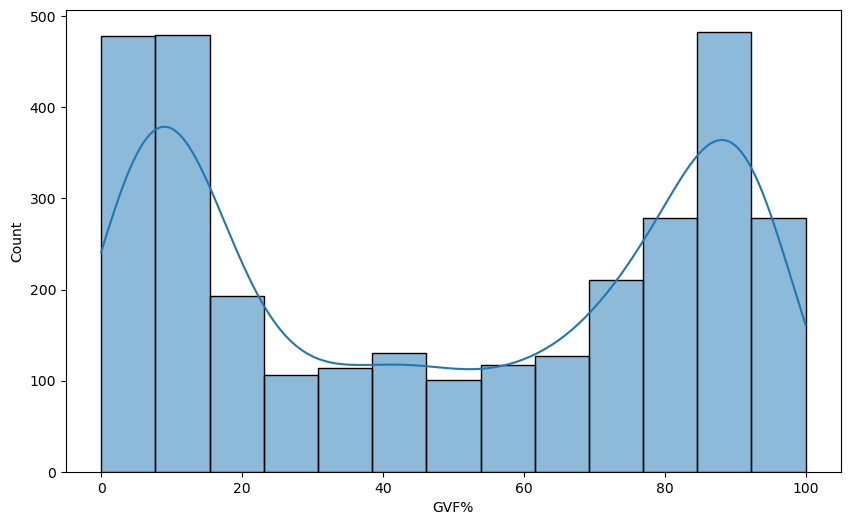

In [30]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(gvf_grp2['GVF%'] , kde = True)

In [31]:
print('SalePrice Skewness is = ' , gvf_grp2['GVF%'].skew())
print("Kurtosis: %f" % gvf_grp2['GVF%'].kurt())

SalePrice Skewness is =  -0.022882082829462656
Kurtosis: -1.650884


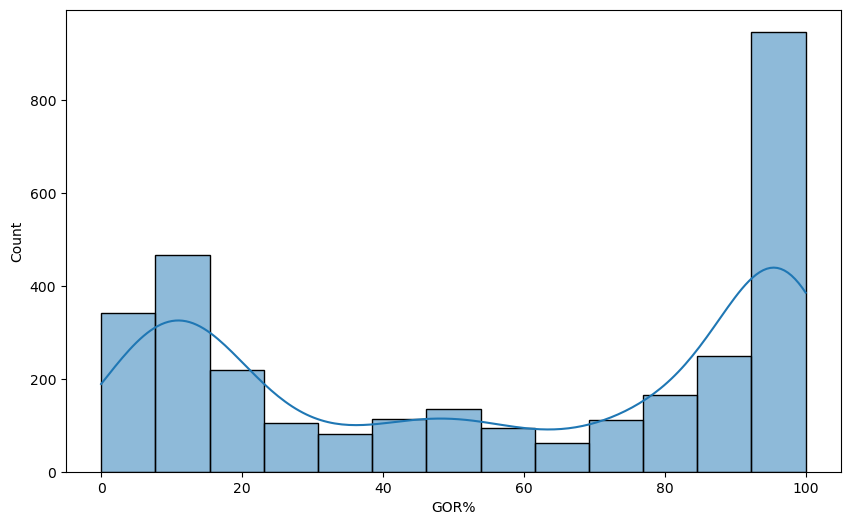

In [32]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(gvf_grp2['GOR%'] , kde = True)

In [33]:
print('SalePrice Skewness is = ' , gvf_grp2['GOR%'].skew())
print("Kurtosis: %f" % gvf_grp2['GOR%'].kurt())

SalePrice Skewness is =  -0.16948230902747832
Kurtosis: -1.667391


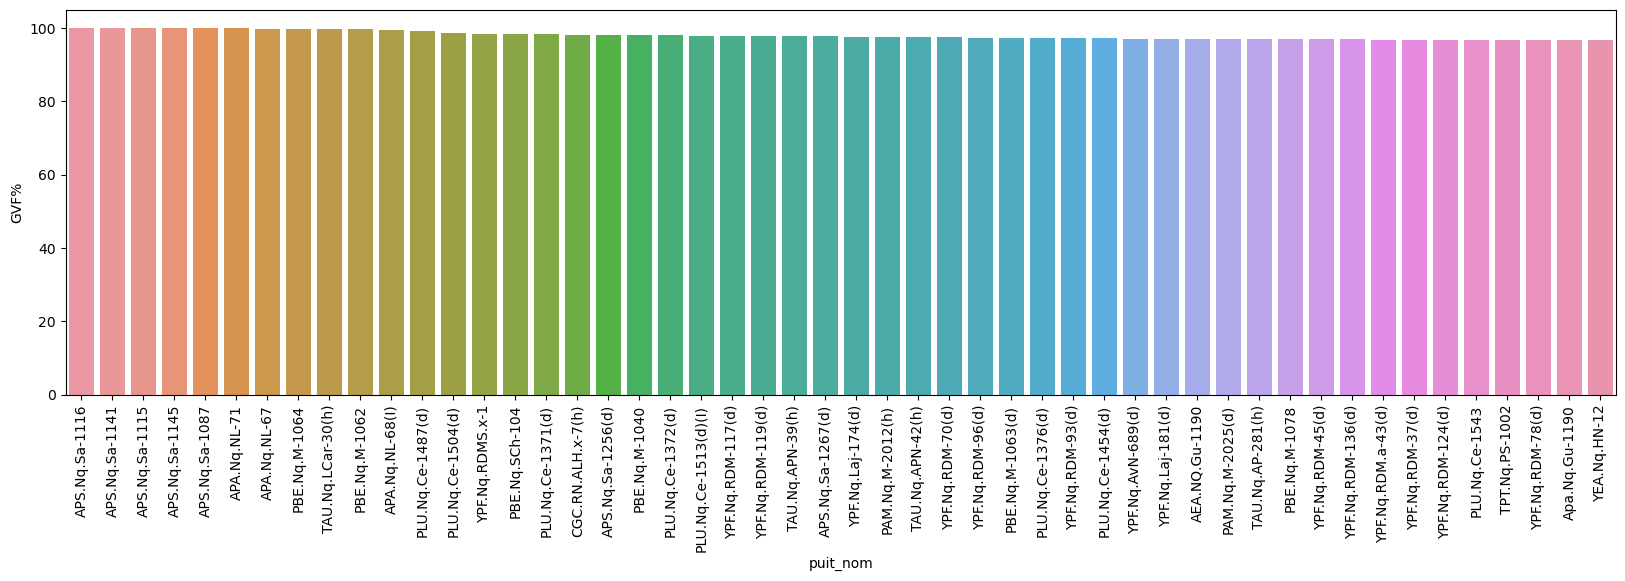

In [34]:
plt.figure(figsize = (20,5))
plt.xticks(rotation='90')
ax = sns.barplot(x = gvf_grp1.head(50).index , y =gvf_grp1['GVF%'].head(50)  )

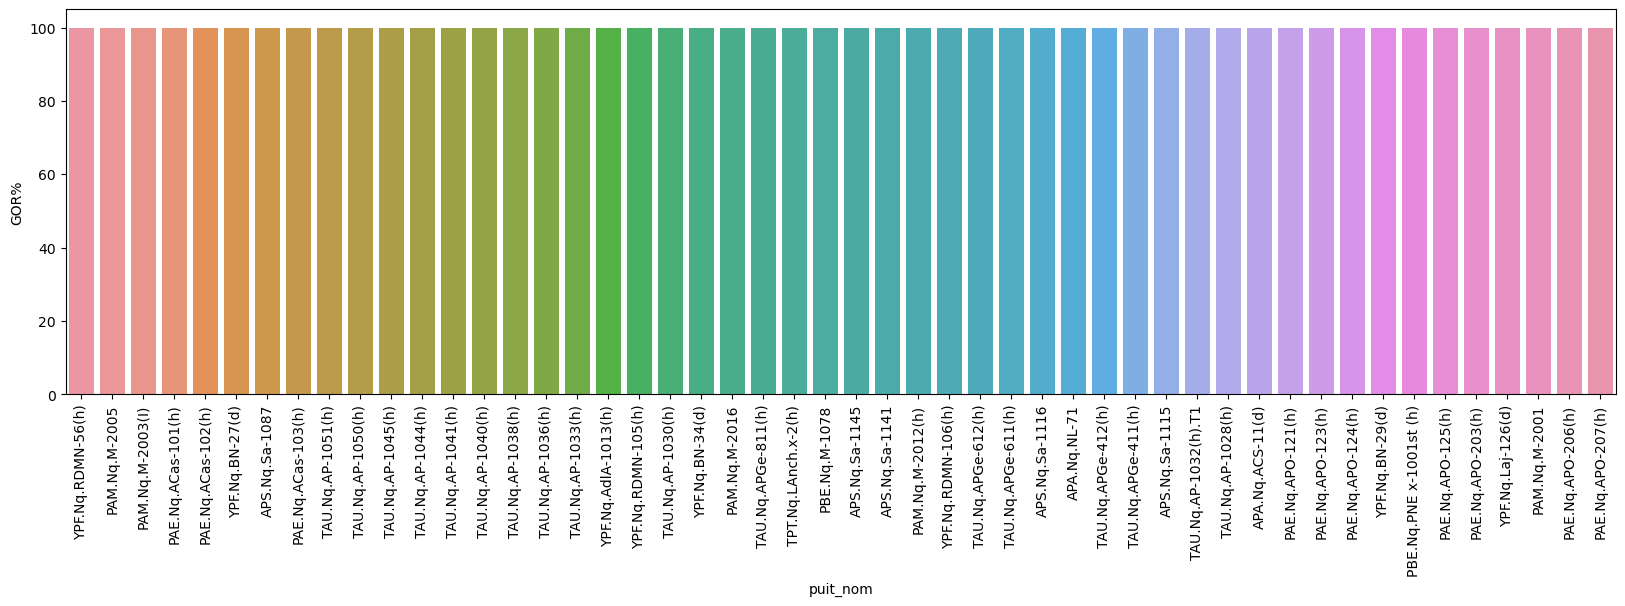

In [35]:
plt.figure(figsize = (20,5))
plt.xticks(rotation='90')
ax = sns.barplot(x = gvf_grp2.head(50).index , y =gvf_grp2['GOR%'].head(50)  )

###  Production distribution

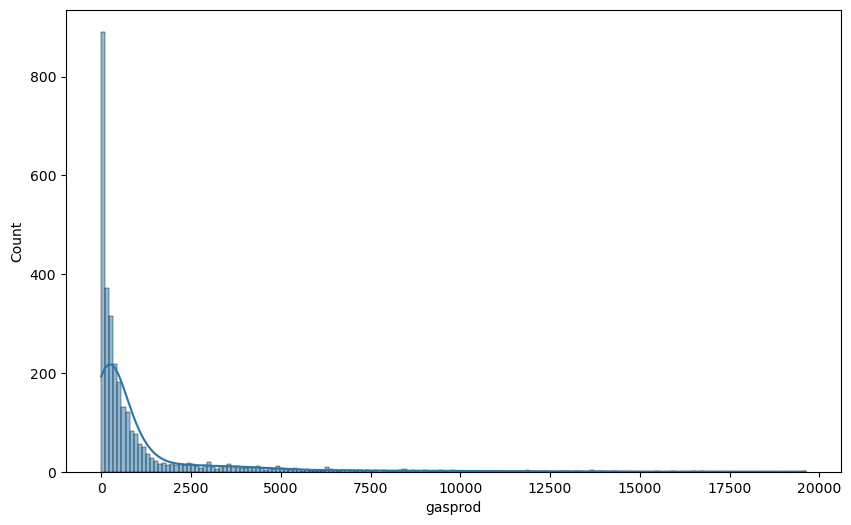

In [36]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(gvf_grp2['gasprod'] , kde = True)

In [37]:
print('SalePrice Skewness is = ' , gvf_grp2['gasprod'].skew())
print("Kurtosis: %f" % gvf_grp2['gasprod'].kurt())

SalePrice Skewness is =  3.6235693597021315
Kurtosis: 15.792157


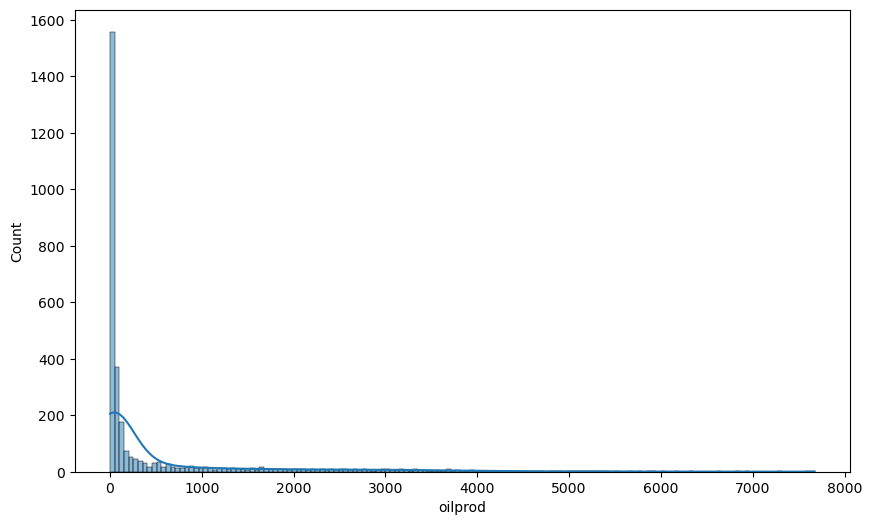

In [38]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(gvf_grp2['oilprod'] , kde = True)

In [39]:
print('SalePrice Skewness is = ' , gvf_grp2['oilprod'].skew())
print("Kurtosis: %f" % gvf_grp2['oilprod'].kurt())

SalePrice Skewness is =  2.712856609945582
Kurtosis: 7.897341


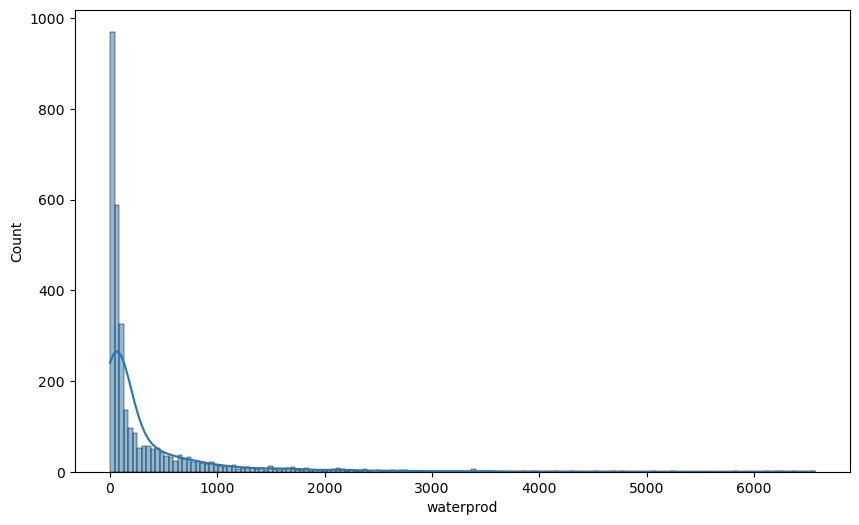

In [40]:
plt.figure(figsize= (10 , 6))
g = sns.histplot(gvf_grp2['waterprod'] , kde = True)

In [41]:
print('SalePrice Skewness is = ' , gvf_grp2['waterprod'].skew())
print("Kurtosis: %f" % gvf_grp2['waterprod'].kurt())

SalePrice Skewness is =  4.127019382966882
Kurtosis: 23.524382


##  Discovring Categorical data 

In [42]:
features = [i for i in df_prod.columns if df_prod[i].dtype == 'O' ]
df_prod[features]
    


puit_nom                        company company_id  \
0       APA.Nq.RCo-1053(d)  YSUR ENERGÍA ARGENTINA S.R.L.       YSUR   
1             AEA.NQ.ACO-5  YSUR ENERGÍA ARGENTINA S.R.L.       YSUR   
2          APA.Nq.CorS.x-1  YSUR ENERGÍA ARGENTINA S.R.L.       YSUR   
3          APA.Nq.Rco-1054  YSUR ENERGÍA ARGENTINA S.R.L.       YSUR   
4        AEA.NQ.RCo.x-2001  YSUR ENERGÍA ARGENTINA S.R.L.       YSUR   
...                    ...                            ...        ...   
227216      ARG.Nq.Cvo.x-2           ARGENTA ENERGIA S.A.       AESA   
227217      ARG.Nq.Cvo.x-2           ARGENTA ENERGIA S.A.       AESA   
227218      ARG.Nq.Cvo.x-2           ARGENTA ENERGIA S.A.       AESA   
227219      ARG.Nq.Cvo.x-2           ARGENTA ENERGIA S.A.       AESA   
227220      ARG.Nq.Cvo.x-2           ARGENTA ENERGIA S.A.       AESA   

                  extraction_type        champ    bassin        class  
0                    Plunger Lift      precuyo  NEUQUINA  EXPLOTACION  
1                    Plunger Lift      precuyo  NEUQUINA  EXPLOTACION  
2       Sin Sistema de Extracción  vaca muerta  NEUQUINA  EXPLORACION  
3               Surgencia Natural      precuyo  NEUQUINA  EXPLOTACION  
4       Sin Sistema de Extracción      precuyo  NEUQUINA  EXPLORACION  
...                           ...          ...       ...          ...  
227216          Surgencia Natural  vaca muerta  NEUQUINA  EXPLORACION  
227217          Surgencia Natural  vaca muerta  NEUQUINA  EXPLORACION  
227218          Surgencia Natural  vaca muerta  NEUQUINA  EXPLORACION  
227219          Surgencia Natural  vaca muerta  NEUQUINA  EXPLORACION  
227220          Surgencia Natural  vaca muerta  NEUQUINA  EXPLORACION  

[225975 rows x 7 columns]

###  Company Production 

In [43]:
df_company = df_prod[['company_id' ,'gasprod','oilprod', 'waterprod']]
comany_prod = df_company.groupby(['company_id' ]).agg('sum')
comany_prod1 = comany_prod.sort_values(by = 'gasprod' , ascending = False )
comany_prod2 =  comany_prod.sort_values(by = 'oilprod' , ascending = False )
comany_prod3 =  comany_prod.sort_values(by = 'waterprod' , ascending = False )

comany_prod2.head()

gasprod       oilprod     waterprod
company_id                                          
YPF         5.353108e+07  2.872414e+07  1.381405e+07
VIS         3.534199e+05  2.964546e+06  1.142202e+06
SHE         5.579682e+05  2.835832e+06  4.210465e+05
PAL         5.296986e+06  2.009495e+06  1.635226e+06
TPT         2.075067e+07  1.148784e+06  3.322402e+06

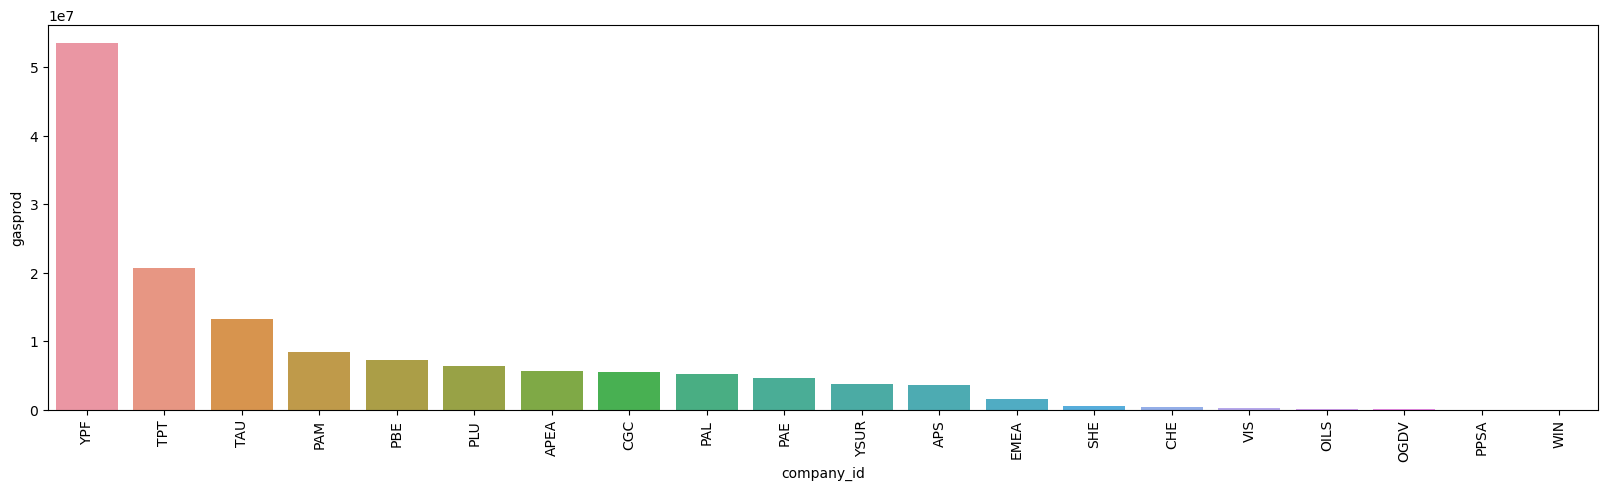

In [44]:
plt.figure(figsize = (20,5))
plt.xticks(rotation='90')
ax = sns.barplot(x = comany_prod1.head(20).index , y =comany_prod1['gasprod'].head(20)  )

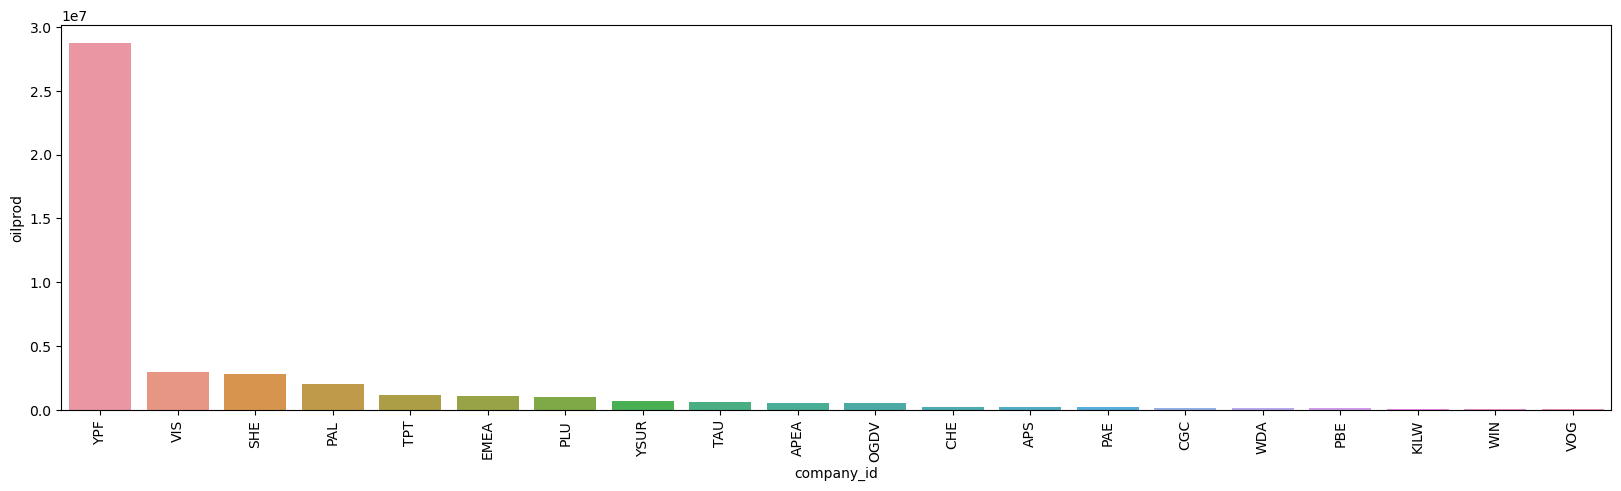

In [45]:
plt.figure(figsize = (20,5))
plt.xticks(rotation='90')
ax = sns.barplot(x = comany_prod2.head(20).index , y =comany_prod2['oilprod'].head(20)  )

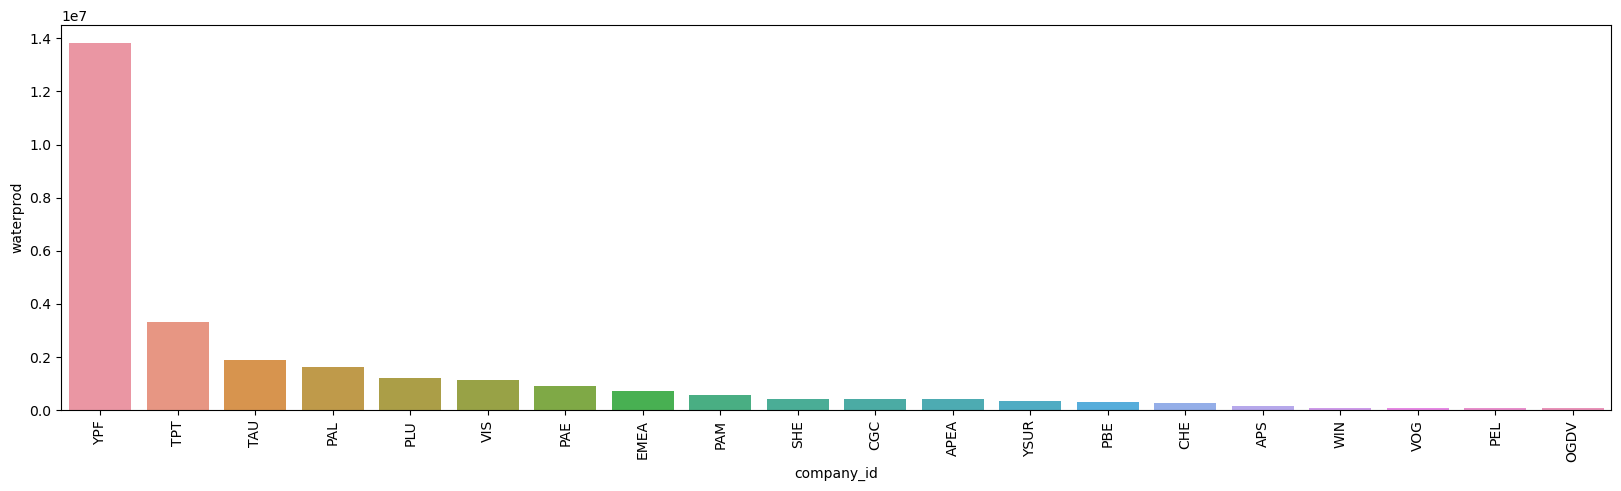

In [46]:
plt.figure(figsize = (20,5))
plt.xticks(rotation='90')
ax = sns.barplot(x = comany_prod3.head(20).index , y =comany_prod3['waterprod'].head(20)  )

(-1.1060736442670818,
 1.106698367352129,
 -1.101603033267446,
 1.1000763569898673)

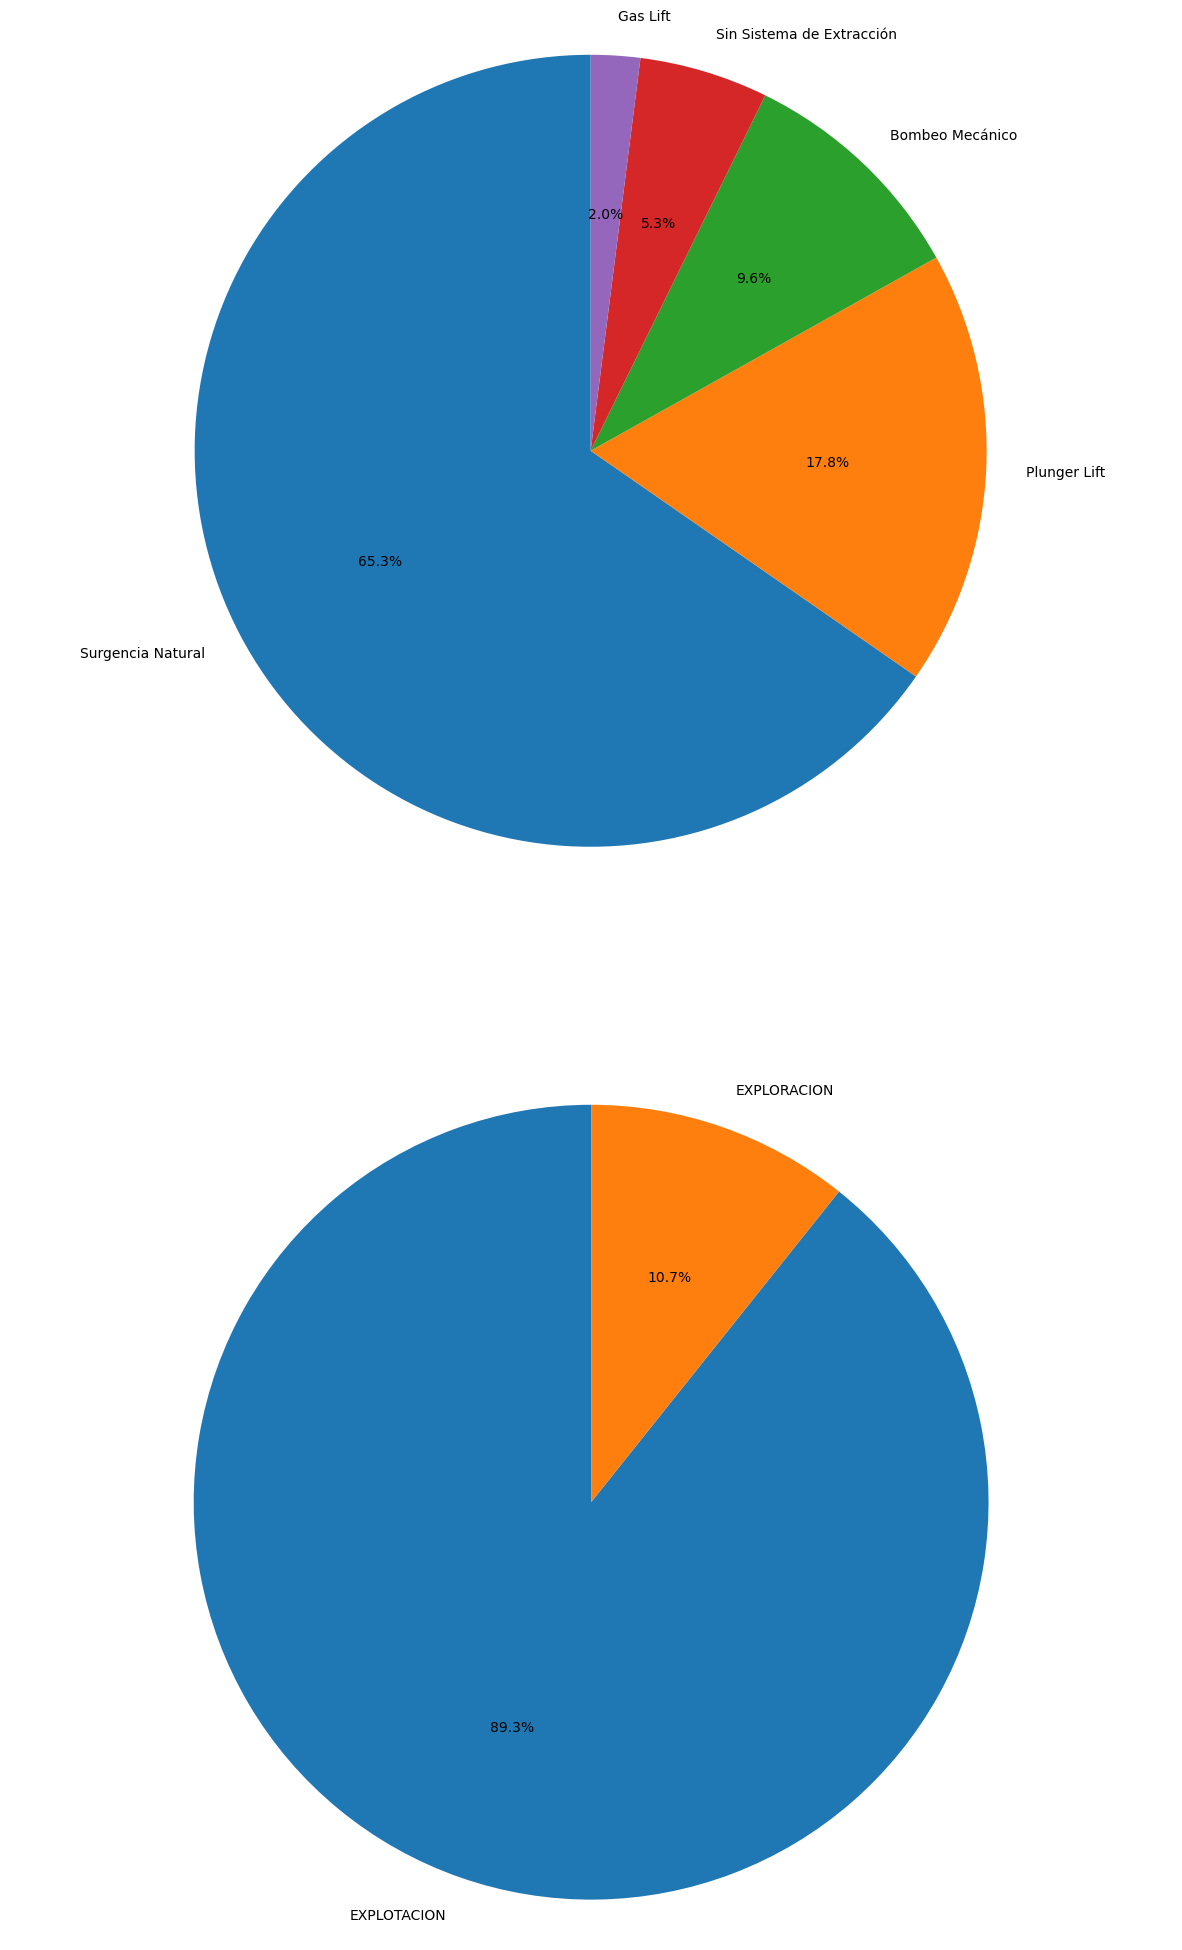

In [47]:

a = np.array(df_prod['extraction_type'].value_counts().sort_values(ascending=False).head(5))
b = np.array(df_prod['class'].value_counts().sort_values(ascending=False).head(2))
labels_a = [i for i in df_prod['extraction_type'].value_counts().sort_values(ascending=False).head(5).index ]
labels_b = [j for j in df_prod['class'].value_counts().sort_values(ascending=False).head(2).index ]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:

fig1, (ax1 ,ax2) = plt.subplots(2,1 , figsize= (15,25))
ax1.pie(a, labels=labels_a, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(b, labels=labels_b, autopct='%1.1f%%',
         startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


<AxesSubplot:>

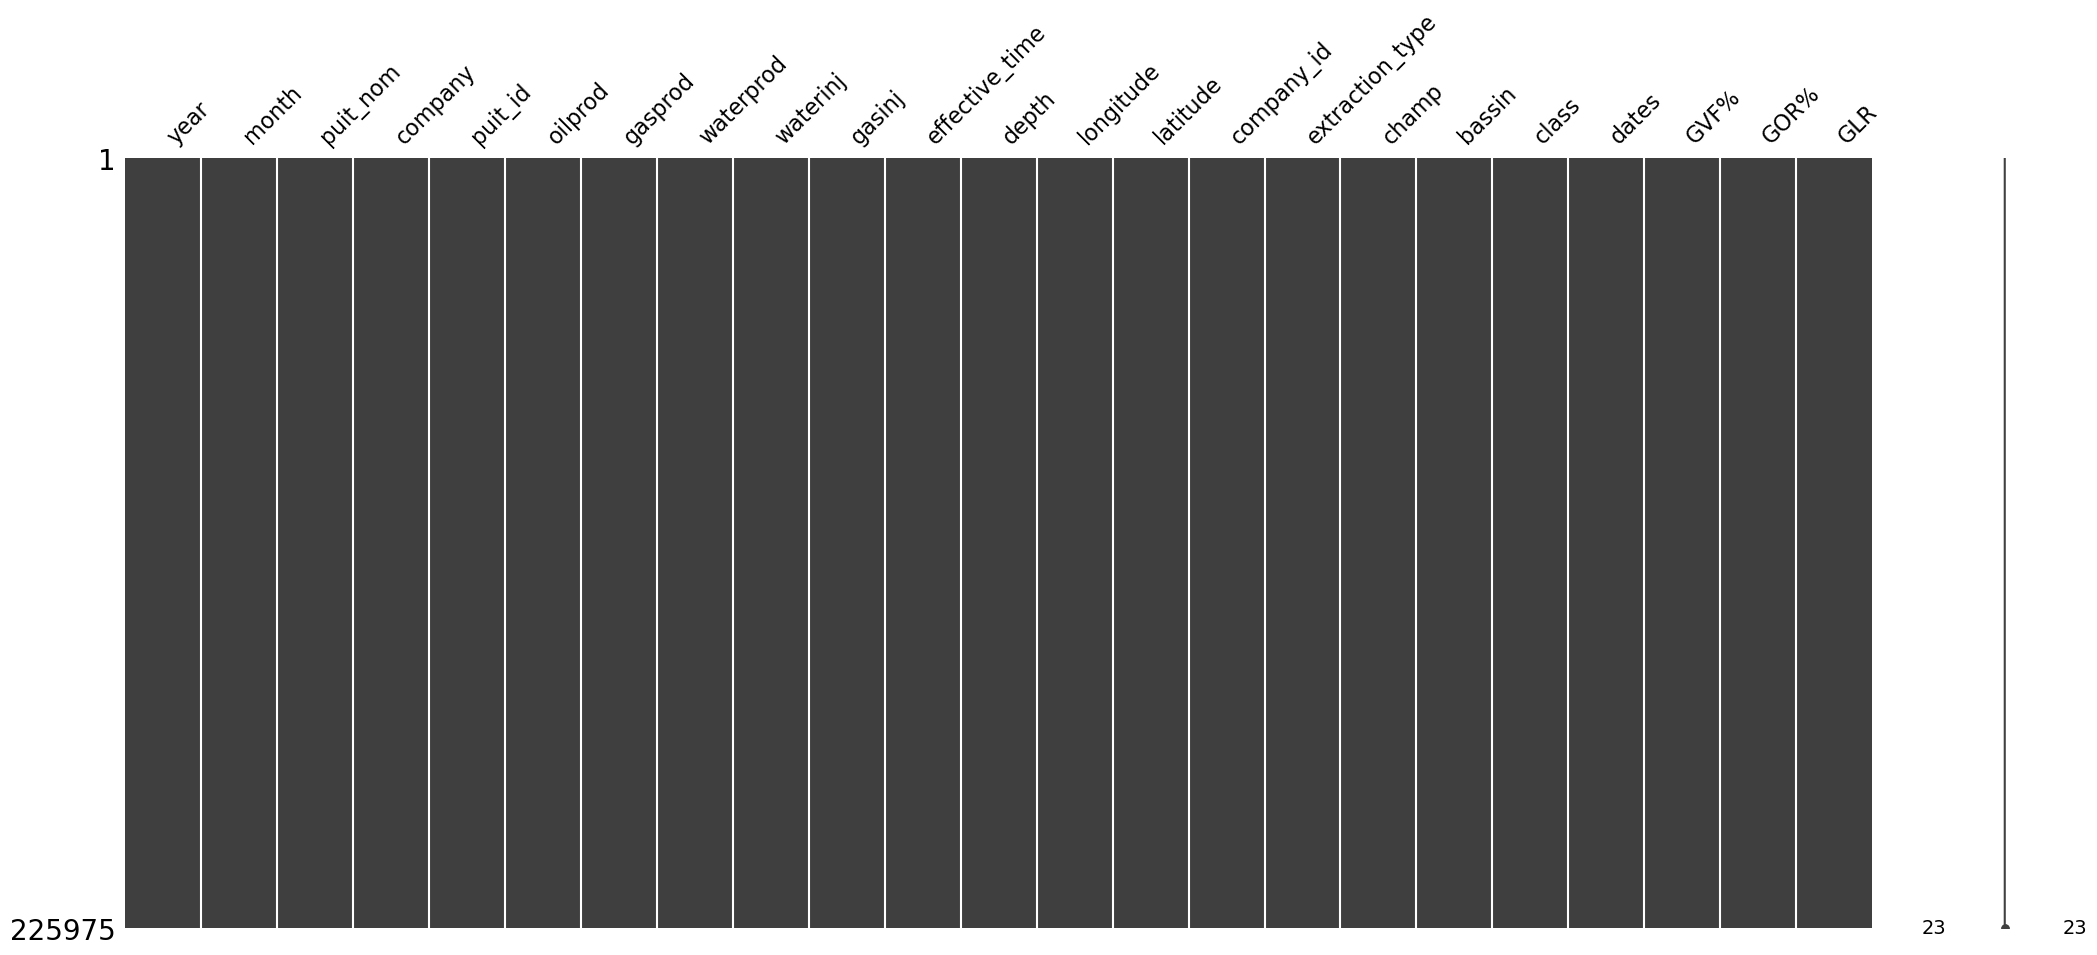

In [48]:
mno.matrix(df_prod)

In [49]:
df_prod.columns

Index(['year', 'month', 'puit_nom', 'company', 'puit_id', 'oilprod', 'gasprod',
       'waterprod', 'waterinj', 'gasinj', 'effective_time', 'depth',
       'longitude', 'latitude', 'company_id', 'extraction_type', 'champ',
       'bassin', 'class', 'dates', 'GVF%', 'GOR%', 'GLR'],
      dtype='object')

In [50]:
df_prod['jour'] = df_prod.dates.dt.day
df_prod['mois'] = df_prod.dates.dt.month
df_prod.head()

year  month            puit_nom                        company  puit_id  \
0  2015      1  APA.Nq.RCo-1053(d)  YSUR ENERGÍA ARGENTINA S.R.L.   147505   
1  2015      1        AEA.NQ.ACO-5  YSUR ENERGÍA ARGENTINA S.R.L.   130515   
2  2015      1     APA.Nq.CorS.x-1  YSUR ENERGÍA ARGENTINA S.R.L.   145329   
3  2015      1     APA.Nq.Rco-1054  YSUR ENERGÍA ARGENTINA S.R.L.   152786   
4  2015      1   AEA.NQ.RCo.x-2001  YSUR ENERGÍA ARGENTINA S.R.L.   133430   

   oilprod  gasprod  waterprod  waterinj  gasinj  ...  \
0     8.52   153.82      14.71       0.0     0.0  ...   
1     0.00    33.24      13.37       0.0     0.0  ...   
2     0.00     0.00       0.00       0.0     0.0  ...   
3   242.14  2195.54      49.30       0.0     0.0  ...   
4     0.00     0.00       0.00       0.0     0.0  ...   

             extraction_type        champ    bassin        class      dates  \
0               Plunger Lift      precuyo  NEUQUINA  EXPLOTACION 2015-01-31   
1               Plunger Lift      precuyo  NEUQUINA  EXPLOTACION 2015-01-31   
2  Sin Sistema de Extracción  vaca muerta  NEUQUINA  EXPLORACION 2015-01-31   
3          Surgencia Natural      precuyo  NEUQUINA  EXPLOTACION 2015-01-31   
4  Sin Sistema de Extracción      precuyo  NEUQUINA  EXPLORACION 2015-01-31   

    GVF%    GOR%   GLR jour mois  
0  86.88   94.75  6.62   31    1  
1  71.32  100.00  2.49   31    1  
2   0.00    0.00  0.00   31    1  
3  88.28   90.07  7.53   31    1  
4   0.00    0.00  0.00   31    1  

[5 rows x 25 columns]

# Machine learning 

we want to predict GAZ , OIl production than GVF and GOR 
Features are : 'month','puit_id','waterinj' ,'gasinj' ,'effective_time','depth','longitude' ,'latitude' ,'comapny_id' , 'extraction_type' , 'champ' , 'bassin' , 'class' , 'dates'

In [51]:
X = df_prod[['jour','mois','puit_id','gasinj' ,'effective_time','depth','longitude' ,'latitude' ,'company_id' , 'extraction_type' , 'champ' , 'bassin' , 'class' ]]
X.head()

jour  mois  puit_id  gasinj  effective_time   depth  longitude   latitude  \
0    31     1   147505     0.0            31.0  2852.0 -69.181060 -39.079080   
1    31     1   130515     0.0            31.0  3428.0 -69.785229 -38.949104   
2    31     1   145329     0.0             0.0  4500.0 -69.903384 -38.067634   
3    31     1   152786     0.0            31.0  2940.0 -69.181060 -39.079080   
4    31     1   133430     0.0             0.0  3204.0 -69.193993 -39.078224   

  company_id            extraction_type        champ    bassin        class  
0       YSUR               Plunger Lift      precuyo  NEUQUINA  EXPLOTACION  
1       YSUR               Plunger Lift      precuyo  NEUQUINA  EXPLOTACION  
2       YSUR  Sin Sistema de Extracción  vaca muerta  NEUQUINA  EXPLORACION  
3       YSUR          Surgencia Natural      precuyo  NEUQUINA  EXPLOTACION  
4       YSUR  Sin Sistema de Extracción      precuyo  NEUQUINA  EXPLORACION

In [52]:
df_prod.describe()

year          month        puit_id        oilprod  \
count  225975.000000  225975.000000  225975.000000  225975.000000   
mean     2017.989317       6.432720  146956.890523     194.456579   
std         3.454965       3.402221   20129.525697     658.680388   
min      2006.000000       1.000000    3640.000000      -0.001000   
25%      2016.000000       4.000000  144701.000000       0.000000   
50%      2019.000000       6.000000  153767.000000       6.654000   
75%      2021.000000       9.000000  157874.000000      69.580000   
max      2022.000000      12.000000  163546.000000   16513.300000   

             gasprod      waterprod       waterinj         gasinj  \
count  225975.000000  225975.000000  225975.000000  225975.000000   
mean      627.020563     123.652108       5.105431       0.152366   
std      1485.639655     411.008027     327.497078       7.427667   
min       -12.267000       0.000000       0.000000       0.000000   
25%        10.330000       0.000000       0.000000       0.000000   
50%       119.840000      11.980000       0.000000       0.000000   
75%       542.760000      66.733775       0.000000       0.000000   
max     29129.660000   16575.560000   32980.690000     709.580000   

       effective_time          depth      longitude       latitude  \
count   225975.000000  225975.000000  225975.000000  225975.000000   
mean        22.544016    3374.770026     -68.802465     -38.884109   
std         11.977183    1045.590465       0.875026       2.210715   
min          0.000000       0.000000     -71.357210     -69.415770   
25%         17.880000    2820.000000     -69.183251     -38.863351   
50%         29.500000    3142.000000     -68.873971     -38.558826   
75%         30.720000    3932.000000     -68.411671     -38.325150   
max         46.880000    7330.000000     -38.590070     -24.116560   

                GVF%           GOR%        GLR           jour           mois  
count  225975.000000  225975.000000  225975.00  225975.000000  225975.000000  
mean       51.313907      57.871354        inf      30.442416       6.432720  
std        39.579785      42.032228        NaN       0.816640       3.402221  
min         0.000000       0.000000      -7.37      28.000000       1.000000  
25%         8.640000      10.840000       0.09      30.000000       4.000000  
50%        56.730000      77.600000       1.31      31.000000       6.000000  
75%        91.590000      98.980000      10.89      31.000000       9.000000  
max       115.760000     115.760000        inf      31.000000      12.000000

## Categrical Encoding 

In [53]:
categorical =[i for i in X.columns if X[i].dtype == 'O']

company_id =[i for i in range(0,X['company_id'].nunique())]
extraction_type = [i for i in range(0,X['extraction_type'].nunique())]
champ = [i for i in range(0,X['champ'].nunique())]
bassin = [0,1,2,3]

coll =  [company_id , extraction_type , champ , bassin , [0,1,2]  ]

for j, i in zip(categorical , coll):
       X[j] = X[j].replace(X[j].unique() , i  )
        


C:\Users\dell\AppData\Local\Temp\ipykernel_12420\4127260520.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[j] = X[j].replace(X[j].unique() , i  )


In [54]:
dictio1 = {
    'company_id' : df_prod['company_id'].unique(),
    'company_id_encoded' : [i for i in range(0,df_prod['company_id'].nunique())]
}
dictio2 = {    
    'extrection_type': df_prod['extraction_type'].unique(),
    'extrection_type_encoded':[i for i in range(0,df_prod['extraction_type'].nunique())]
}
dictio3 ={
    
    'champ' : df_prod['champ'].unique(),
    'champ_encoded' : [i for i in range(0,df_prod['champ'].nunique())]
}

dictio4 = {
    'bassin':df_prod['bassin'].unique(),
    'bassin_encoded': [0,1,2,3]
    
}

dictio5 = {
    'class' : df_prod['class'].unique(),
    'class_encoded' :[0,1,2]
}



for j in [dictio1,dictio2,dictio3,dictio4,dictio5]:
      print(pd.DataFrame(j))
      print('---------------------------')
     

   company_id  company_id_encoded
0        YSUR                   0
1         YPF                   1
2         WIN                   2
3         WDA                   3
4         VOG                   4
5         VNO                   5
6         VIS                   6
7         TPT                   7
8         TAU                   8
9         SHE                   9
10        ROC                  10
11       PTRE                  11
12       PPSA                  12
13        PLU                  13
14        PEL                  14
15        PBE                  15
16        PAM                  16
17        PAL                  17
18        PAE                  18
19       OILS                  19
20       OGDV                  20
21        MSA                  21
22        MAD                  22
23       KILW                  23
24       GTIE                  24
25       GREC                  25
26       GPNE                  26
27       ENE1                  27
28       EMEA 

In [55]:
def target(i):
    Y = np.array(df_prod[i])
    return Y 

X = np.array(X)
#x = x.toarray()

In [56]:
df_prod[round(0.7*df_prod.shape[0]):round(0.3*df_prod.shape[0])]

Empty DataFrame
Columns: [year, month, puit_nom, company, puit_id, oilprod, gasprod, waterprod, waterinj, gasinj, effective_time, depth, longitude, latitude, company_id, extraction_type, champ, bassin, class, dates, GVF%, GOR%, GLR, jour, mois]
Index: []

[0 rows x 25 columns]

##  Train test split 

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

y_gaz = target('gasprod')
y_water = target('waterprod')
y_oil =  target('oilprod')
y_gvf = target('GVF%')
y_gor = target('GOR%')

def split(X,Y):
# train test split
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)
    x_validation = x_train[round(0.7*x_train.shape[0]):]
    y_validation = y_train[round(0.7*y_train.shape[0]):]
    x_train = x_train[0:round(0.7*x_train.shape[0])]
    y_train = y_train[0:round(0.7*y_train.shape[0])]
    return x_train,x_test,y_train,y_test,x_validation,y_validation 
    
  

##  Predicting For GVF

In [58]:
x_train,x_test,y_train,y_test,x_validation,y_validation = split(X,y_gvf)
print(x_train.shape ,   y_train.shape)
print(x_test.shape ,   y_test.shape)
print(x_validation.shape ,   y_validation.shape)



(110727, 13) (110727,)
(67793, 13) (67793,)
(47455, 13) (47455,)


## Standard Scaling 

In [59]:
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR


from sklearn.model_selection import GridSearchCV , learning_curve
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

D:\ANACONDA LAST\envs\tf-gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Tree based models 

###  CatBoost 

In [60]:
cat_features = [0, 1, 7, 8]

catboost_model = CatBoostRegressor(
    iterations=500,
    max_ctr_complexity=4,
    random_seed=0,
    od_type='Iter',
    od_wait=25,
    verbose=50,
    depth=4
)

catboost_model.fit(x_train, y_train,
    
    eval_set=(x_validation, y_validation)
)

Learning rate set to 0.162732
0:	learn: 34.5057707	test: 34.4745768	best: 34.4745768 (0)	total: 244ms	remaining: 2m 1s
50:	learn: 14.2204149	test: 14.3743889	best: 14.3743889 (50)	total: 654ms	remaining: 5.76s
100:	learn: 13.5116506	test: 13.7323060	best: 13.7323060 (100)	total: 1.09s	remaining: 4.32s
150:	learn: 13.1124002	test: 13.3589880	best: 13.3589880 (150)	total: 1.51s	remaining: 3.5s
200:	learn: 12.7653218	test: 13.0479375	best: 13.0479375 (200)	total: 1.94s	remaining: 2.89s
250:	learn: 12.5172537	test: 12.8057135	best: 12.8057135 (250)	total: 2.36s	remaining: 2.34s
300:	learn: 12.3011061	test: 12.6043485	best: 12.6043485 (300)	total: 2.79s	remaining: 1.84s
350:	learn: 12.1181108	test: 12.4375369	best: 12.4375369 (350)	total: 3.21s	remaining: 1.36s
400:	learn: 11.9461654	test: 12.2612985	best: 12.2612985 (400)	total: 3.63s	remaining: 895ms
450:	learn: 11.8024266	test: 12.1262382	best: 12.1262382 (450)	total: 4.09s	remaining: 444ms
499:	learn: 11.6937601	test: 12.0288235	best: 1

In [61]:
print('Model params:', catboost_model.get_params())

Model params: {'iterations': 500, 'depth': 4, 'loss_function': 'RMSE', 'od_wait': 25, 'od_type': 'Iter', 'random_seed': 0, 'verbose': 50, 'max_ctr_complexity': 4}


In [62]:
catboost_train_pred = catboost_model.predict(x_train)
catboost_val_pred = catboost_model.predict(x_validation)
catboost_test_pred = catboost_model.predict(x_test)

In [63]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, catboost_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, catboost_val_pred)))

Train rmse: 11.69376009133432
Validation rmse: 12.028823548843368


In [64]:
print(f"train score of : {catboost_model.score(x_train, y_train)}  ,  test score of  : {catboost_model.score(x_test, y_test)} ") 

train score of : 0.9126291203238047  ,  test score of  : 0.9095324021961025 


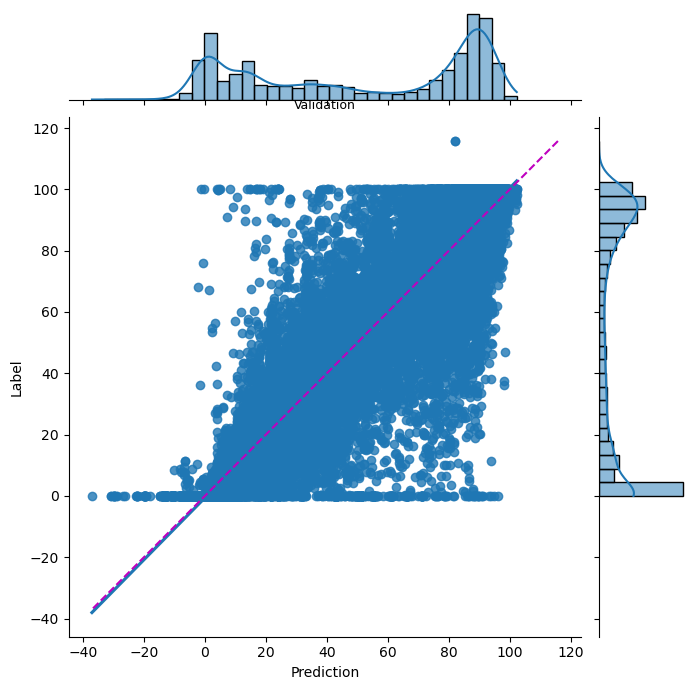

In [65]:
def model_performance_sc_plot(predictions, labels, title):
    # Get min and max values of the predictions and labels.
    min_val = max(max(predictions), max(labels))
    max_val = min(min(predictions), min(labels))
    # Create dataframe with predicitons and labels.
    performance_df = pd.DataFrame({"Label":labels})
    performance_df["Prediction"] = predictions
    # Plot data
    sns.jointplot(y="Label", x="Prediction", data=performance_df, kind="reg", height=7)
    plt.plot([min_val, max_val], [min_val, max_val], 'm--')
    plt.title(title, fontsize=9)
    plt.show()
    
# model_performance_sc_plot(catboost_train_pred, Y_train, 'Train')
model_performance_sc_plot(catboost_val_pred, y_validation, 'Validation')

### XGBoost 

In [66]:
xgb_model = XGBRegressor(max_depth=8, 
                         n_estimators=500, 
                         min_child_weight=1000,  
                         colsample_bytree=0.7, 
                         subsample=0.7, 
                         eta=0.3, 
                         seed=0)
xgb_model.fit(x_train, 
              y_train, 
              eval_metric="rmse", 
              eval_set=[(x_train, y_train), (x_validation, y_validation)], 
              verbose=20, 
              early_stopping_rounds=20)

[0]	validation_0-rmse:46.61967	validation_1-rmse:46.67945
[20]	validation_0-rmse:13.20534	validation_1-rmse:13.47754
[40]	validation_0-rmse:12.68812	validation_1-rmse:13.01186
[60]	validation_0-rmse:12.37083	validation_1-rmse:12.71261
[80]	validation_0-rmse:12.13875	validation_1-rmse:12.51071
[100]	validation_0-rmse:11.96795	validation_1-rmse:12.35418
[120]	validation_0-rmse:11.80921	validation_1-rmse:12.22383
[140]	validation_0-rmse:11.64989	validation_1-rmse:12.09174
[160]	validation_0-rmse:11.52967	validation_1-rmse:11.98792
[180]	validation_0-rmse:11.41487	validation_1-rmse:11.89805
[200]	validation_0-rmse:11.31609	validation_1-rmse:11.80959
[220]	validation_0-rmse:11.21964	validation_1-rmse:11.73077
[240]	validation_0-rmse:11.12084	validation_1-rmse:11.64104
[260]	validation_0-rmse:11.03575	validation_1-rmse:11.56831
[280]	validation_0-rmse:10.96260	validation_1-rmse:11.50848
[300]	validation_0-rmse:10.89543	validation_1-rmse:11.45666
[320]	validation_0-rmse:10.83901	validation_1-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             eta=0.3, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=8, min_child_weight=1000, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=0, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

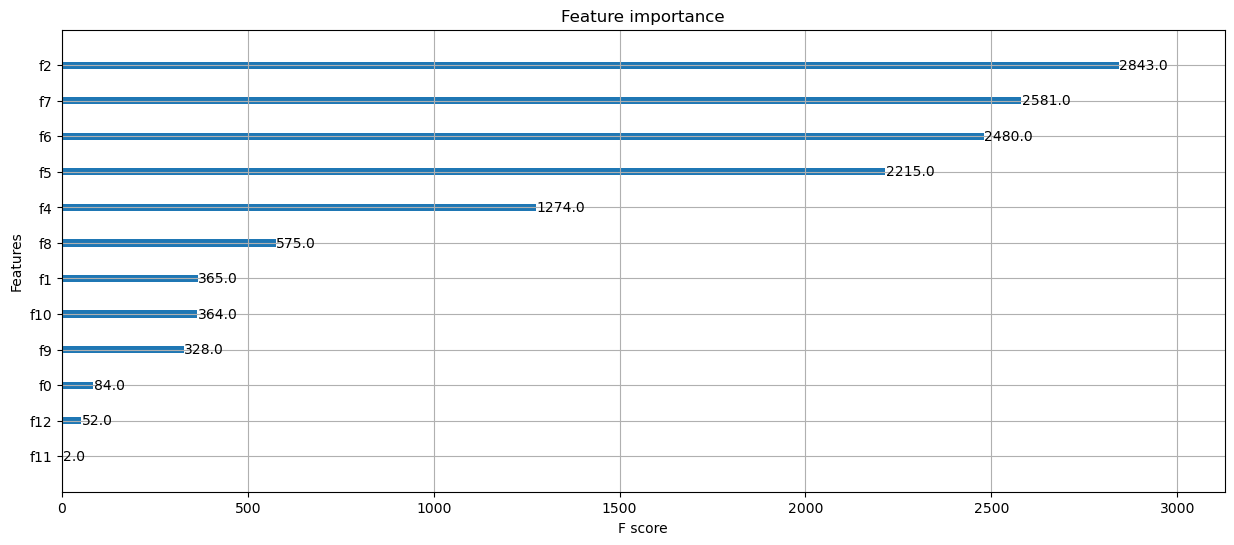

In [67]:
plt.rcParams["figure.figsize"] = (15, 6)
plot_importance(xgb_model)
plt.show()

In [68]:
xgb_train_pred = xgb_model.predict(x_train)
xgb_val_pred = xgb_model.predict(x_validation)
xgb_test_pred = xgb_model.predict(x_test)

In [69]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, xgb_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, xgb_val_pred)))

Train rmse: 10.42590160454432
Validation rmse: 11.097892736786271


In [70]:
print(f"train score of : {xgb_model.score(x_train, y_train)}  ,  test score of  : {xgb_model.score(x_test, y_test)} ") 

train score of : 0.9305478662527142  ,  test score of  : 0.9226062171545504 


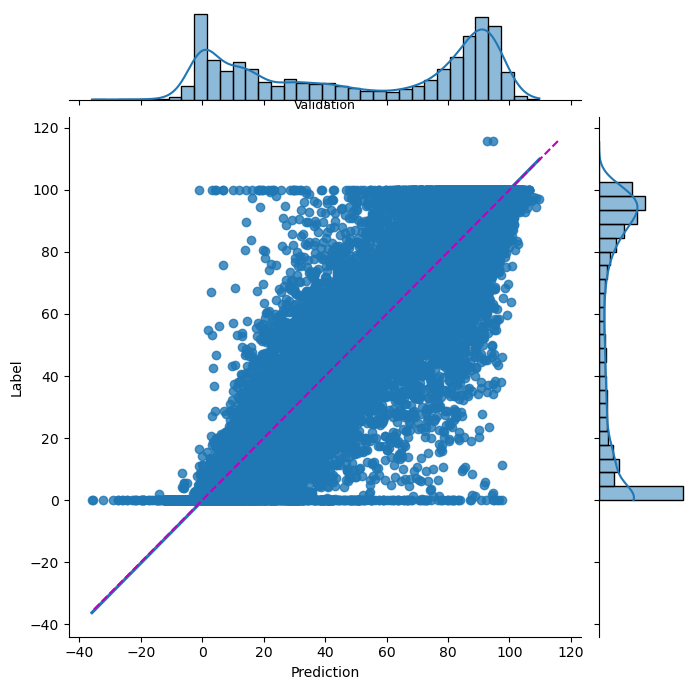

In [71]:
# model_performance_sc_plot(xgb_train_pred, Y_train, 'Train')
model_performance_sc_plot(xgb_val_pred, y_validation, 'Validation')

###  Random Forest 

In [72]:
rf_model = RandomForestRegressor(n_estimators=50, max_depth=7, random_state=0, n_jobs=-1)
rf_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=50, n_jobs=-1, random_state=0)

In [73]:
rf_train_pred = rf_model.predict(x_train)
rf_val_pred = rf_model.predict(x_validation)
rf_test_pred = rf_model.predict(x_test)

In [74]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, rf_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, rf_val_pred)))

Train rmse: 13.6185948276552
Validation rmse: 13.820204873396678


In [75]:
print(f"train score of : {rf_model.score(x_train, y_train)}  ,  test score of  : {rf_model.score(x_test, y_test)} ") 

train score of : 0.8814987456334633  ,  test score of  : 0.878052006371925 


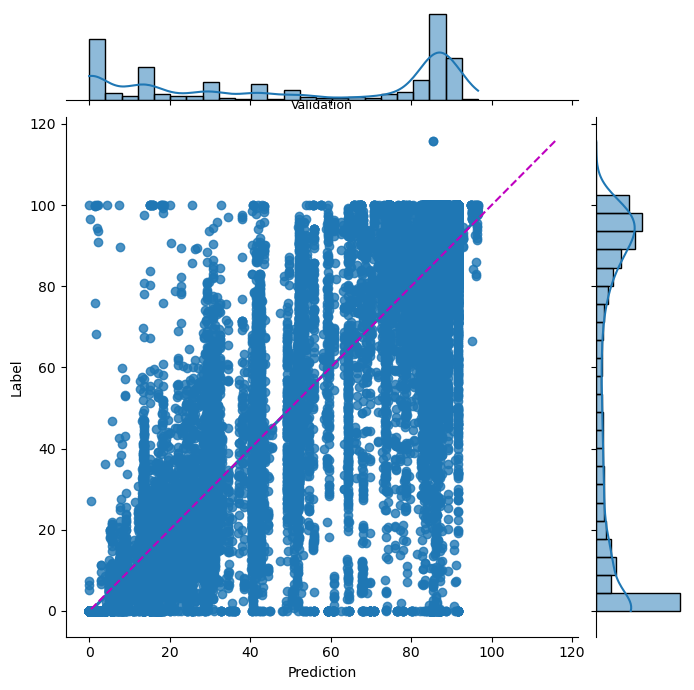

In [76]:
# model_performance_sc_plot(rf_train_pred, Y_train, 'Train')
model_performance_sc_plot(rf_val_pred, y_validation, 'Validation')

##  Linear Models 

#### Normalising data 

In [77]:
lr_scaler = MinMaxScaler()
lr_scaler.fit(x_train)
lr_train = lr_scaler.transform(x_train)
lr_val = lr_scaler.transform(x_validation)
lr_test = lr_scaler.transform(x_test)

In [78]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(lr_train, y_train)

LinearRegression(n_jobs=-1)

In [79]:
lr_train_pred = lr_model.predict(lr_train)
lr_val_pred = lr_model.predict(lr_val)
lr_test_pred = lr_model.predict(lr_test)

In [80]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lr_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, lr_val_pred)))

Train rmse: 28.470424424318658
Validation rmse: 28.663855285035932


In [81]:
print(f"train score of : {lr_model.score(lr_train, y_train)}  ,  test score of  : {lr_model.score(lr_test, y_test)} ") 

train score of : 0.4820996172098936  ,  test score of  : 0.48408973259288446 


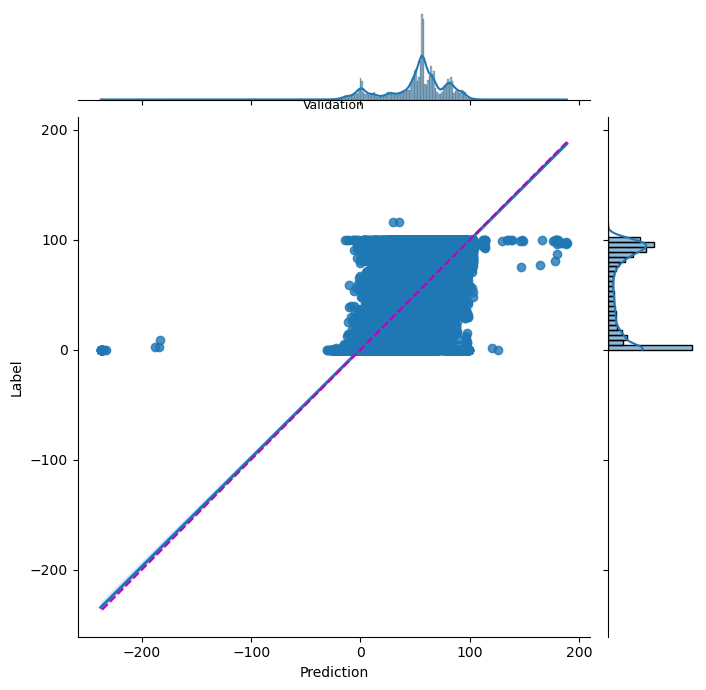

In [82]:
# model_performance_sc_plot(lr_train_pred, Y_train, 'Train')
model_performance_sc_plot(lr_val_pred, y_validation, 'Validation')

## Clusterning Models 

###  KNN Regressor 

####  Normalising Features 

In [83]:
knn_scaler = MinMaxScaler()
knn_scaler.fit(x_train)
knn_train = knn_scaler.transform(x_train)
knn_val = knn_scaler.transform(x_validation)
knn_test = knn_scaler.transform(x_test)

In [84]:
knn_model = KNeighborsRegressor(n_neighbors=9, leaf_size=13, n_jobs=-1)
knn_model.fit(knn_train, y_train)

KNeighborsRegressor(leaf_size=13, n_jobs=-1, n_neighbors=9)

In [85]:
knn_train_pred = knn_model.predict(lr_train)
knn_val_pred = knn_model.predict(lr_val)
knn_test_pred = knn_model.predict(lr_test)

In [86]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, knn_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, knn_val_pred)))

Train rmse: 15.488852905557595
Validation rmse: 17.898327230284423


In [87]:
print(f"train score of : {knn_model.score(knn_train, y_train)}  ,  test score of  : {knn_model.score(knn_test, y_test)} ") 

train score of : 0.8467159876817141  ,  test score of  : 0.8013284350558103 


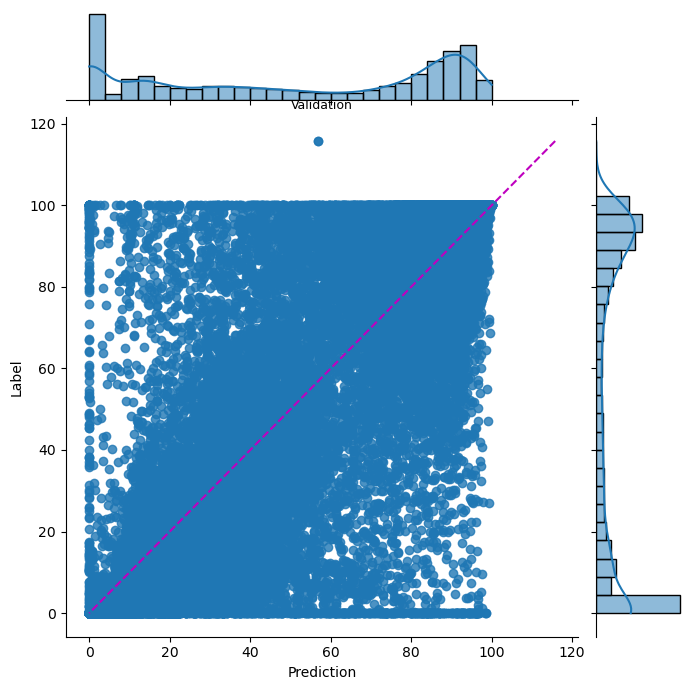

In [88]:
# model_performance_sc_plot(knn_train_pred, Y_train_sampled, 'Train')
model_performance_sc_plot(knn_val_pred, y_validation, 'Validation')

 ### Ridge Regressor


In [89]:
ridge_scaler = MinMaxScaler()
ridge_scaler.fit(x_train)
ridge_train = ridge_scaler.transform(x_train)
ridge_val = ridge_scaler.transform(x_validation)
ridge_test = ridge_scaler.transform(x_test)

In [90]:
# Ridge Regressor
ridge_alphas = [1e-15, 1e-10, 1e-8, 9e-4, 7e-4, 5e-4, 3e-4, 1e-4, 1e-3, 5e-2, 1e-2, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50, 75, 100]
ridge =  RidgeCV(alphas=ridge_alphas)
ridge.fit(ridge_train , y_train)

RidgeCV(alphas=[1e-15, 1e-10, 1e-08, 0.0009, 0.0007, 0.0005, 0.0003, 0.0001,
                0.001, 0.05, 0.01, 0.1, 0.3, 1, 3, 5, 10, 15, 18, 20, 30, 50,
                75, 100])

In [91]:
ridge_train_pred = ridge.predict(ridge_train)
ridge_val_pred = ridge.predict(ridge_val)
ridge_test_pred = ridge.predict(ridge_test)

In [92]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, ridge_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, ridge_val_pred)))

Train rmse: 28.47066381918136
Validation rmse: 28.660685560562786


In [93]:
print(f"train score of : {ridge.score(ridge_train, y_train)}  ,  test score of  : {ridge.score(ridge_test, y_test)} ") 

train score of : 0.4820909075952815  ,  test score of  : 0.4840280111178087 


### Light Gradient Boosting Regressor

In [94]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', verbose=1,random_state=42)
lightgbm.fit(x_train , y_train)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1394
[LightGBM] [Info] Number of data points in the train set: 110727, number of used features: 13
[LightGBM] [Info] Start training from score 51.371828


LGBMRegressor(objective='regression', random_state=42, verbose=1)

In [95]:
lightgbm_train_pred = lightgbm.predict(x_train)
lightgbm_val_pred = lightgbm.predict(x_validation)
lightgbm_test_pred = lightgbm.predict(x_test)

In [96]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, lightgbm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, lightgbm_val_pred)))

Train rmse: 11.216323352958044
Validation rmse: 11.578176457418973


In [97]:
print(f"train score of : {lightgbm.score(x_train, y_train)}  ,  test score of  : {lightgbm.score(x_test, y_test)} ") 

train score of : 0.9196178920385495  ,  test score of  : 0.9159888037806938 


###  Gradient boosting Regressor 

In [98]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(loss='huber',random_state=42)  
gbr.fit(x_train , y_train)

GradientBoostingRegressor(loss='huber', random_state=42)

In [99]:
gbr_train_pred = gbr.predict(x_train)
gbr_val_pred = gbr.predict(x_validation)
gbr_test_pred = gbr.predict(x_test)

In [100]:
print('Train rmse:', np.sqrt(mean_squared_error(y_train, gbr_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(y_validation, gbr_val_pred)))

Train rmse: 14.478978859788228
Validation rmse: 14.61819943469824


In [101]:
print(f"train score of : {gbr.score(x_train, y_train)}  ,  test score of  : {gbr.score(x_test, y_test)} ") 

train score of : 0.8660526218942867  ,  test score of  : 0.8641552349797428 


# DEEP NEURAL NETWORK

In [102]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

In [103]:
x_train,x_test,y_train,y_test = train_test_split(X,y_gvf,test_size = 0.3,random_state = 1)
dl_train = knn_scaler.transform(x_train)
dl_test = knn_scaler.transform(x_test)


###  LOSS Tracking

In [104]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

###  Building Model

In [105]:


tf.random.set_seed(42)

model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])

model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

model.fit(dl_train, y_train, epochs=100)

Epoch 1/100
4944/4944 [==============================] - 10s 2ms/step - loss: 24.5144 - rmse: 24.5151
Epoch 2/100
4944/4944 [==============================] - 8s 2ms/step - loss: 19.7729 - rmse: 19.7736
Epoch 3/100
4944/4944 [==============================] - 8s 2ms/step - loss: 16.5653 - rmse: 16.5636
Epoch 4/100
4944/4944 [==============================] - 8s 2ms/step - loss: 15.5122 - rmse: 15.5108
Epoch 5/100
4944/4944 [==============================] - 9s 2ms/step - loss: 15.1407 - rmse: 15.1440: 0s - loss: 1
Epoch 6/100
4944/4944 [==============================] - 9s 2ms/step - loss: 14.8399 - rmse: 14.8394
Epoch 7/100
4944/4944 [==============================] - 9s 2ms/step - loss: 14.6634 - rmse: 14.6621
Epoch 8/100
4944/4944 [==============================] - 8s 2ms/step - loss: 14.4957 - rmse: 14.4951
Epoch 9/100
4944/4944 [==============================] - 8s 2ms/step - loss: 14.3820 - rmse: 14.3805
Epoch 10/100
4944/4944 [==============================] - 9s 2ms/step - loss

4944/4944 [==============================] - 12s 2ms/step - loss: 12.3410 - rmse: 12.3405
Epoch 81/100
4944/4944 [==============================] - 10s 2ms/step - loss: 12.3313 - rmse: 12.3300
Epoch 82/100
4944/4944 [==============================] - 10s 2ms/step - loss: 12.3414 - rmse: 12.3409
Epoch 83/100
4944/4944 [==============================] - 11s 2ms/step - loss: 12.2999 - rmse: 12.2986
Epoch 84/100
4944/4944 [==============================] - 10s 2ms/step - loss: 12.3202 - rmse: 12.3203
Epoch 85/100
4944/4944 [==============================] - 12s 2ms/step - loss: 12.2941 - rmse: 12.2937
Epoch 86/100
4944/4944 [==============================] - 10s 2ms/step - loss: 12.3176 - rmse: 12.3163
Epoch 87/100
4944/4944 [==============================] - 10s 2ms/step - loss: 12.2936 - rmse: 12.2928
Epoch 88/100
4944/4944 [==============================] - 10s 2ms/step - loss: 12.2883 - rmse: 12.2868
Epoch 89/100
4944/4944 [==============================] - 11s 2ms/step - loss: 12.2874

###  Making predictions 

In [106]:
predictions = model.predict(dl_test)
predictions[:5]

array([[ 0.09977293],
       [82.34533   ],
       [83.57551   ],
       [93.14925   ],
       [94.21339   ]], dtype=float32)

In [107]:
predictions = np.ravel(predictions)
predictions[:5]

array([ 0.09977293, 82.34533   , 83.57551   , 93.14925   , 94.21339   ],
      dtype=float32)

###  model evaluation

In [108]:
rmse(y_test, predictions).numpy()

12.834760153704105

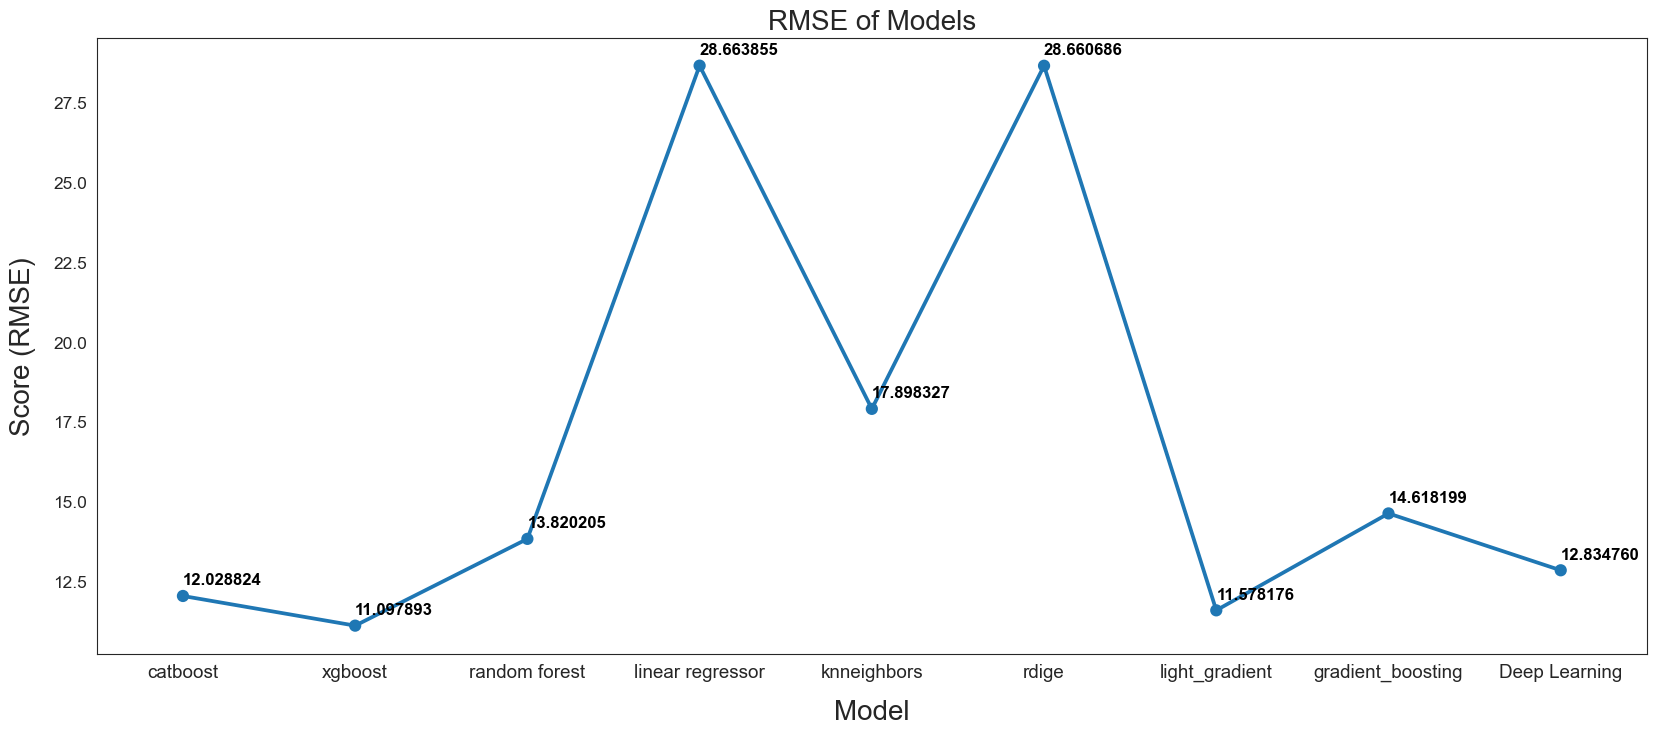

In [109]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(20, 8))
scores_keys = ['catboost' ,'xgboost' ,'random forest' ,'linear regressor' , 'knneighbors' , 'rdige' ,'light_gradient','gradient_boosting' , 'Deep Learning']
scores_values = [np.sqrt(mean_squared_error(y_validation, catboost_val_pred)) , np.sqrt(mean_squared_error(y_validation, xgb_val_pred)),
                np.sqrt(mean_squared_error(y_validation, rf_val_pred)) ,np.sqrt(mean_squared_error(y_validation, lr_val_pred)),
                 np.sqrt(mean_squared_error(y_validation, knn_val_pred)) ,np.sqrt(mean_squared_error(y_validation, ridge_val_pred)) ,
               np.sqrt(mean_squared_error(y_validation, lightgbm_val_pred)) ,np.sqrt(mean_squared_error(y_validation, gbr_val_pred)), 
                 rmse(y_test, predictions).numpy()] 


ax = sns.pointplot(x=list(scores_keys), y=[score for score in scores_values], markers=['o'], linestyles=['-'])

for i, score in enumerate(scores_values):
    ax.text(i, score + 0.352, '{:.6f}'.format(score), horizontalalignment='left', size='large', color='black', weight='semibold')
    
plt.ylabel('Score (RMSE)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('RMSE of Models', size=20)

plt.show()

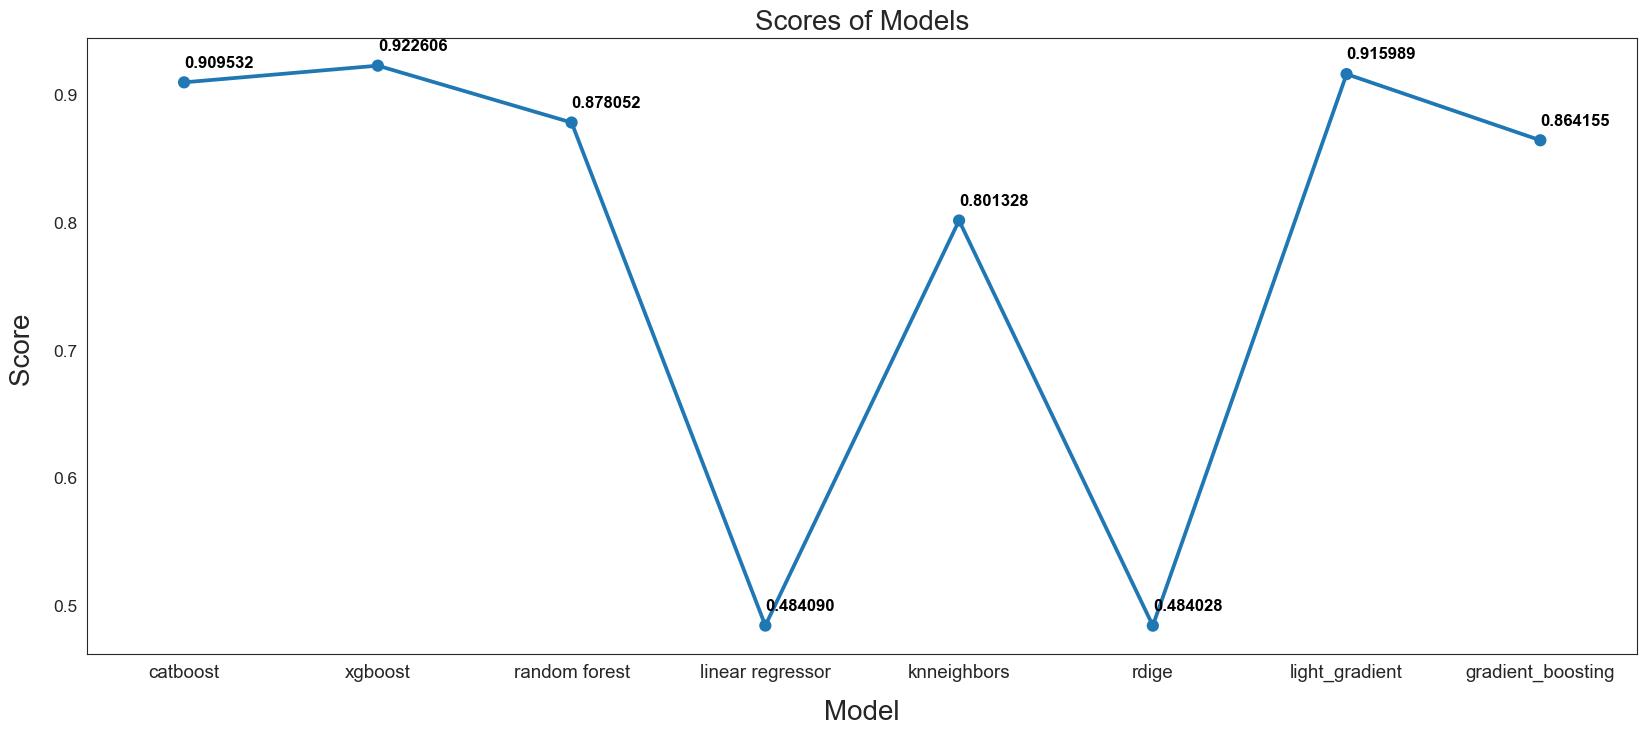

In [110]:
# Plot the predictions for each model
sns.set_style("white")
fig = plt.figure(figsize=(20, 8))
scores_keys = ['catboost' ,'xgboost' ,'random forest' ,'linear regressor' , 'knneighbors' , 'rdige' ,'light_gradient','gradient_boosting' ]
scores_values = [catboost_model.score(x_test, y_test) , xgb_model.score(x_test, y_test),
                rf_model.score(x_test, y_test),lr_model.score(lr_test, y_test) ,knn_model.score(knn_test, y_test),
                ridge.score(ridge_test, y_test) ,lightgbm.score(x_test, y_test) ,
               gbr.score(x_test, y_test) ] 


ax = sns.pointplot(x=list(scores_keys), y=[score for score in scores_values], markers=['o'], linestyles=['-'])

for i, score in enumerate(scores_values):
    ax.text(i, score + 0.012, '{:.6f}'.format(score), horizontalalignment='left', size='large', color='black', weight='semibold')
    
plt.ylabel('Score ', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Scores of Models', size=20)

plt.show()